In [1]:
import pandas as pd 
import numpy as np
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import librosa
import librosa.display

In [3]:
audio, sr= librosa.load("Urban sound/fold2/14387-9-0-7.wav")
sound= ipd.Audio('Urban sound/fold2/14387-9-0-7.wav')

In [4]:
sound

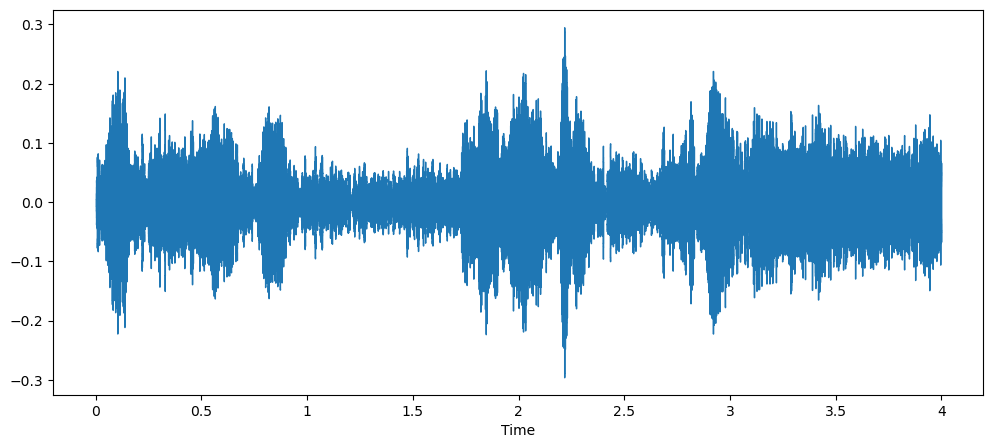

In [5]:
plt.figure(figsize=(12, 5))
librosa.display.waveshow(audio, sr=sr)

In [6]:
metadata = pd.read_csv(r"D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban sound\UrbanSound8K.csv")
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [7]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 173)
[[-342.80853   -293.0072    -261.54074   ... -272.89746   -282.14014
  -280.1596   ]
 [ 152.38298    155.27512    152.45688   ...  152.14107    152.17421
   158.31046  ]
 [ -31.97842    -53.84063    -68.6378    ...  -56.637245   -53.78813
   -52.551105 ]
 ...
 [   6.731371     7.1601534    4.177191  ...   -4.9987526   -4.8812246
    -7.610378 ]
 [  14.920063    21.16299     18.30568   ...   11.553658    20.741058
    14.579522 ]
 [ -12.344748    -5.726247    -0.6987896 ...    6.7622747    9.126047
     2.1231675]]


In [8]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [9]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
audio_dataset_path='Urban Sound'
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100032-3-0-0.wav


3it [00:00,  4.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-117.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-121.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-126.wav


5it [00:00,  6.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-137.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-143.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-161.wav


9it [00:01, 10.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100263-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100648-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100648-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100648-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100648-1-3-0.wav


14it [00:01, 17.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100648-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/100652-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/100652-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/100652-3-0-2.wav


19it [00:01, 13.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/100652-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100795-3-0-0.wav


21it [00:01, 13.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100795-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100795-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/100795-3-1-2.wav


23it [00:02, 13.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-10.wav


27it [00:02, 13.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-13.wav


29it [00:02, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-16.wav


33it [00:02, 13.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-19.wav


35it [00:02, 13.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-21.wav


39it [00:03, 13.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-24.wav


41it [00:03, 13.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-27.wav


45it [00:03, 13.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-3.wav


47it [00:03, 13.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-5.wav


51it [00:04, 13.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-8.wav


53it [00:04, 13.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/100852-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/101281-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/101281-3-0-14.wav


57it [00:04, 13.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/101281-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-12.wav


59it [00:04, 12.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-29.wav


63it [00:05, 12.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/101382-2-0-45.wav


65it [00:05, 12.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/101415-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/101415-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/101415-3-0-8.wav


69it [00:05, 13.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-12.wav


71it [00:05, 13.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-16.wav


75it [00:05, 13.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-19.wav


77it [00:06, 13.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-23.wav


81it [00:06, 12.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-28.wav


83it [00:06, 12.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-32.wav


87it [00:06, 12.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-37.wav


89it [00:07, 12.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-4.wav


93it [00:07, 12.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/101729-0-0-9.wav


95it [00:07, 12.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/101848-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/101848-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/101848-9-0-2.wav


99it [00:07, 12.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/101848-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/101848-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/101848-9-0-9.wav


105it [00:08, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/102102-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102103-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102103-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102104-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/102105-3-0-0.wav


108it [00:08, 18.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/102106-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/102305-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/102547-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/102547-3-0-7.wav


110it [00:08, 16.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/102547-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/102842-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/102842-3-1-0.wav


114it [00:08, 14.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/102842-3-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/102842-3-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-0.wav


116it [00:08, 14.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-3.wav


120it [00:09, 13.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-0-6.wav


122it [00:09, 13.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/102853-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-1.wav


126it [00:09, 13.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-12.wav


128it [00:09, 13.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-15.wav


132it [00:10, 13.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-18.wav


136it [00:10, 13.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-20.wav


138it [00:10, 12.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-23.wav


140it [00:10, 12.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-26.wav


144it [00:11, 12.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-29.wav


146it [00:11, 12.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-4.wav


150it [00:11, 13.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-7.wav


152it [00:11, 13.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/102857-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102858-5-0-0.wav


156it [00:11, 13.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102858-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-1.wav


158it [00:12, 13.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-12.wav


162it [00:12, 13.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-15.wav


164it [00:12, 13.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-4.wav


168it [00:12, 12.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-7.wav


170it [00:13, 12.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/102871-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-0-0.wav


174it [00:13, 12.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-0.wav


176it [00:13, 12.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-3.wav


180it [00:13, 12.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-1-6.wav


184it [00:14, 12.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-3-1.wav


186it [00:14, 12.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-0.wav


188it [00:14, 12.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-3.wav


192it [00:14, 12.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103074-7-4-6.wav


197it [00:15, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/103076-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/103076-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/103076-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-0-3.wav


199it [00:15, 14.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-0-6.wav


203it [00:15, 14.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-10.wav


207it [00:15, 14.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-3.wav


209it [00:16, 13.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-6.wav


213it [00:16, 13.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-2-9.wav


217it [00:16, 15.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103199-4-7-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-0.wav


219it [00:16, 13.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-11.wav


223it [00:17, 13.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-14.wav


225it [00:17, 13.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-17.wav


229it [00:17, 13.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-2.wav


231it [00:17, 12.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-5.wav


235it [00:17, 12.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-8.wav


237it [00:18, 12.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/103249-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-1.wav


241it [00:18, 11.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-12.wav


243it [00:18, 11.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-15.wav


247it [00:19, 12.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-18.wav


249it [00:19, 12.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-3.wav


253it [00:19, 12.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-6.wav


255it [00:19, 12.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/103258-5-0-9.wav


259it [00:19, 12.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103357-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/103357-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/103438-5-0-0.wav


261it [00:20, 12.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/103438-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/103438-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-15.wav


265it [00:20, 11.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-26.wav


267it [00:20, 12.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-30.wav


269it [00:20, 12.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/104327-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-1.wav


273it [00:21, 12.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-29.wav


275it [00:21, 13.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-0-7.wav


279it [00:21, 11.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104421-2-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-21.wav


281it [00:21, 10.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-29.wav


283it [00:22,  8.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-35.wav


285it [00:22,  8.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-41.wav


287it [00:22,  6.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-48.wav


289it [00:23,  6.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-52.wav


291it [00:23,  6.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-55.wav


293it [00:23,  5.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-0-66.wav


295it [00:24,  6.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-1-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/104625-4-1-8.wav


298it [00:24,  7.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-10.wav


301it [00:24,  9.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-3.wav


304it [00:25, 10.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-6.wav


307it [00:25, 10.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-8.wav


309it [00:25, 10.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/104817-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-0-5.wav


311it [00:25, 11.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-10-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-10-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-10-13.wav


313it [00:25, 11.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-10-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-10-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-10-9.wav


317it [00:26, 11.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-11-2.wav


319it [00:26, 11.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-12-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-14-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-14-5.wav


321it [00:26, 11.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-14-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-15-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-15-3.wav


325it [00:26, 11.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-15-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-15-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-16-0.wav


327it [00:27, 11.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-16-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-16-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-16-5.wav


331it [00:27, 11.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-16-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-16-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-0.wav


333it [00:27, 11.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-14.wav


337it [00:27, 11.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-17-8.wav


339it [00:28, 11.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-18-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-18-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-18-3.wav


343it [00:28, 11.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-18-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-19-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-19-3.wav


345it [00:28, 11.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-19-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-19-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-19-8.wav


349it [00:28, 11.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-19-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-2-4.wav


351it [00:29, 11.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-3-1.wav


353it [00:29, 11.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-7-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-7-4.wav


357it [00:29, 11.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-7-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-7-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-13.wav


359it [00:29, 11.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-17.wav


363it [00:30, 12.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-8-7.wav


365it [00:30, 12.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-9-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/104998-7-9-9.wav


369it [00:30, 11.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-2.wav


371it [00:30, 11.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-5.wav


375it [00:31, 11.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-1.wav


377it [00:31, 11.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-12.wav


381it [00:31, 12.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-3.wav


383it [00:31, 12.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-6.wav


387it [00:32, 11.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-1-9.wav


389it [00:32, 11.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-10.wav


393it [00:32, 11.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-13.wav


395it [00:32, 11.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-16.wav


399it [00:33, 11.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-4.wav


401it [00:33, 11.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-7.wav


405it [00:33, 12.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-2-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-0.wav


407it [00:33, 12.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-3.wav


411it [00:34, 12.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-6.wav


413it [00:34, 11.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-4-1.wav


417it [00:34, 12.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105029-7-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105088-3-0-10.wav


419it [00:34, 12.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105088-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105088-3-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/105088-3-0-8.wav


423it [00:35, 12.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-0-2.wav


425it [00:35, 12.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-0-5.wav


429it [00:35, 12.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-1-2.wav


431it [00:35, 11.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-0.wav


435it [00:36, 12.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-3.wav


437it [00:36, 11.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-6.wav


441it [00:36, 12.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/105289-8-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/105319-3-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/105319-3-0-29.wav


443it [00:36, 12.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/105319-3-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-15.wav


447it [00:37, 11.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-24.wav


449it [00:37, 11.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/105415-2-0-8.wav


453it [00:37, 11.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/105425-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/105425-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/105425-9-0-12.wav


455it [00:37, 11.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/105425-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/105425-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/105425-9-0-23.wav


459it [00:38, 12.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/106014-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/106014-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/106014-5-0-2.wav


461it [00:38, 11.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/106014-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/106014-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-0.wav


465it [00:38, 12.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-11.wav


467it [00:38, 12.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-14.wav


471it [00:39, 12.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-17.wav


473it [00:39, 12.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-2.wav


477it [00:39, 12.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-4.wav


479it [00:39, 12.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-7.wav


483it [00:40, 12.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/106015-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/106486-5-0-0.wav


485it [00:40, 12.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/106486-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/106486-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/106487-5-0-0.wav


489it [00:40, 12.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/106487-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/106487-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/106905-5-0-0.wav


491it [00:40, 12.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/106905-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/106905-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/106905-8-0-0.wav


495it [00:41, 12.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/106905-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/106905-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/106905-8-0-3.wav


501it [00:41, 17.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/106955-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/107090-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/107090-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/107190-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-1.wav


503it [00:41, 16.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-4.wav


507it [00:41, 14.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/107228-5-0-7.wav


509it [00:42, 13.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-2.wav


513it [00:42, 12.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-5.wav


515it [00:42, 12.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-0-8.wav


519it [00:42, 12.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-10.wav


521it [00:43, 12.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-13.wav


525it [00:43, 12.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-16.wav


527it [00:43, 12.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-2.wav


531it [00:43, 12.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-5.wav


533it [00:44, 12.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-8.wav


537it [00:44, 11.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/107357-8-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/107653-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/107653-9-0-14.wav


539it [00:44, 12.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/107653-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/107653-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/107653-9-0-5.wav


543it [00:44, 12.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/107653-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-0-1.wav


547it [00:45, 13.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-2-0.wav


549it [00:45, 12.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-2-3.wav


553it [00:45, 14.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/107842-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-2.wav


555it [00:45, 13.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-6.wav


559it [00:46, 12.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108041-9-0-9.wav


563it [00:46, 16.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/108187-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/108187-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/108187-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/108187-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/108357-9-0-15.wav


565it [00:46, 15.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/108357-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/108357-9-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/108357-9-0-30.wav


569it [00:46, 13.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/108357-9-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/108357-9-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-11.wav


571it [00:46, 12.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-23.wav


575it [00:47, 11.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-7.wav


577it [00:47, 11.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/108362-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/108638-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/108638-9-0-1.wav


581it [00:47, 11.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/108638-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/108638-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/108638-9-0-5.wav


583it [00:47, 12.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/108638-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/109233-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/109233-3-0-4.wav


587it [00:48, 12.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/109233-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/109233-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/109263-9-0-34.wav


589it [00:48, 12.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/109263-9-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/109263-9-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/109263-9-0-61.wav


593it [00:48, 12.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/109263-9-0-78.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-134.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-14.wav


595it [00:48, 11.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-153.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-32.wav


599it [00:49, 11.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/109703-2-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/109711-3-1-0.wav


601it [00:49, 12.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/109711-3-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/109711-3-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/110134-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/110371-3-0-1.wav


606it [00:49, 12.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/110371-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/110371-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/110389-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/110621-7-0-0.wav


610it [00:50, 13.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/110621-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/110621-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/110621-7-0-3.wav


614it [00:50, 13.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/110622-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/110688-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/110688-3-0-17.wav


616it [00:50, 13.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/110688-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/110688-3-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/110868-9-0-11.wav


618it [00:50, 12.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/110868-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/110868-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/110868-9-0-15.wav


622it [00:51, 12.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/110868-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/110868-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/110918-3-0-1.wav


624it [00:51, 12.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/110918-3-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/110918-3-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/110918-3-0-9.wav


629it [00:51, 13.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111048-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-2.wav


631it [00:51, 13.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-5.wav


635it [00:52, 12.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-0.wav


637it [00:52, 12.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-11.wav


641it [00:52, 12.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-14.wav


643it [00:52, 12.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-4.wav


647it [00:53, 12.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-7.wav


649it [00:53, 12.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/111386-5-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-0.wav


653it [00:53, 12.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-11.wav


655it [00:53, 11.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-14.wav


659it [00:54, 11.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-17.wav


661it [00:54, 11.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-2.wav


665it [00:54, 11.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-22.wav


667it [00:54, 11.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-5.wav


671it [00:55, 11.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-8.wav


673it [00:55, 11.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/111671-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/112075-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/112075-5-0-1.wav


677it [00:55, 12.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/112075-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/112195-3-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/112195-3-0-48.wav


681it [00:55, 13.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/112195-3-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/112195-3-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/113160-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-1.wav


683it [00:56, 10.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-3.wav


685it [00:56,  8.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-5.wav


688it [00:56,  7.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113201-5-0-7.wav


690it [00:57,  7.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-1.wav


692it [00:57,  6.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-11.wav


694it [00:57,  6.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-13.wav


696it [00:58,  6.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-15.wav


698it [00:58,  6.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-17.wav


700it [00:58,  7.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-19.wav


702it [00:59,  7.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-20.wav


704it [00:59,  6.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-22.wav


706it [00:59,  6.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-24.wav


708it [00:59,  6.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-26.wav


710it [01:00,  6.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-28.wav


712it [01:00,  6.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-4.wav


714it [01:00,  6.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-6.wav


716it [01:01,  6.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-8.wav


718it [01:01,  6.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113202-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-0.wav


720it [01:01,  5.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-1.wav


721it [01:02,  5.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-3.wav


723it [01:02,  6.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-5.wav


725it [01:02,  6.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-7.wav


727it [01:03,  6.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-1-0.wav


729it [01:03,  6.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-1-2.wav


730it [01:03,  6.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-3-0.wav


733it [01:03,  6.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-4-0.wav


735it [01:04,  7.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-6-0.wav


736it [01:04,  6.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113203-5-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-0-0.wav


740it [01:04,  8.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-1.wav


742it [01:04,  7.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-3.wav


744it [01:05,  7.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-5.wav


746it [01:05,  6.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-7.wav


748it [01:05,  6.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-8.wav


749it [01:06,  6.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/113205-5-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113216-5-0-0.wav


751it [01:06,  6.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113216-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113216-5-0-2.wav


753it [01:06,  6.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113216-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/113216-5-0-4.wav


756it [01:07,  8.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/113601-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/113601-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/113601-9-0-33.wav


758it [01:07,  9.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/113601-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/113601-9-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/113601-9-0-42.wav


763it [01:07, 13.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113785-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/113785-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/114280-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/114280-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/114587-3-0-2.wav


767it [01:07, 12.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/114587-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/114587-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/114587-3-0-7.wav


769it [01:07, 12.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/115239-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/115239-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/115239-9-0-2.wav


773it [01:08, 12.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/115239-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/115239-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/115239-9-0-5.wav


775it [01:08, 12.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/115240-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/115240-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/115240-9-0-28.wav


779it [01:08, 12.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/115240-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/115240-9-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/115240-9-0-4.wav


781it [01:08, 12.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-2.wav


785it [01:09, 12.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-8.wav


787it [01:09, 12.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115241-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115242-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115242-9-0-44.wav


791it [01:09, 12.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115242-9-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115242-9-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115242-9-0-70.wav


793it [01:09, 12.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115242-9-0-83.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/115243-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/115243-9-0-16.wav


797it [01:10, 12.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/115243-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/115243-9-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/115243-9-0-81.wav


799it [01:10, 12.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/115243-9-0-94.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115411-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115411-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/115411-3-3-0.wav


804it [01:10, 13.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115415-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115415-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115415-9-0-4.wav


806it [01:10, 12.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115415-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115415-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115415-9-0-7.wav


810it [01:11, 11.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115418-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115418-9-0-12.wav


812it [01:11, 12.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115418-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115418-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115418-9-0-29.wav


817it [01:11, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/115418-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/115535-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/115536-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/115537-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/116163-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/116163-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/116163-3-2-0.wav


821it [01:11, 19.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/116400-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/116400-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/116400-3-1-1.wav


824it [01:12, 16.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/116400-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/116423-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/116423-2-0-1.wav


828it [01:12, 15.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/116423-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/116423-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/116423-2-0-4.wav


830it [01:12, 14.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/116483-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/116483-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/116483-3-1-0.wav


834it [01:12, 13.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/116483-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/116484-3-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/116484-3-0-16.wav


836it [01:13, 12.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/116484-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/116484-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/116485-3-0-4.wav


840it [01:13, 12.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/116485-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/116485-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/116485-3-2-4.wav


842it [01:13, 12.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117048-3-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117048-3-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117048-3-0-25.wav


846it [01:13, 12.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117048-3-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117072-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117072-3-0-14.wav


848it [01:14, 12.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117072-3-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/117072-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-0.wav


852it [01:14, 12.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-11.wav


854it [01:14, 12.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-3.wav


858it [01:14, 12.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-6.wav


860it [01:15, 12.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/117181-8-0-9.wav


865it [01:15, 15.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/11722-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/11722-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/117271-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/117271-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/117271-3-0-2.wav


870it [01:15, 15.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/117271-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/117536-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/117889-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/117889-9-0-20.wav


872it [01:15, 14.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/117889-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/117889-9-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/117889-9-0-39.wav


877it [01:16, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/117889-9-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/118070-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/118072-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118101-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118101-3-0-3.wav


881it [01:16, 14.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118101-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118101-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-0.wav


883it [01:16, 14.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-11.wav


887it [01:16, 12.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-2.wav


889it [01:17, 12.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-5.wav


891it [01:17, 12.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-7.wav


893it [01:17, 11.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118278-4-0-9.wav


897it [01:17, 11.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-10.wav


899it [01:17, 11.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-13.wav


903it [01:18, 12.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-3.wav


907it [01:18, 12.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-6.wav


909it [01:18, 13.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118279-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-1-0.wav


919it [01:18, 28.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/118440-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/118496-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/118496-1-1-0.wav
D:\Divya_D

923it [01:19, 27.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-1-1.wav


926it [01:19, 23.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-2-1.wav


932it [01:19, 20.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/118558-5-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/118587-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/118587-3-0-21.wav


935it [01:19, 20.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/118587-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/118723-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/118961-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/118962-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/118963-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/118964-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/119067-0-0-0.wav


943it [01:20, 22.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/119067-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/119067-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119420-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119420-3-1-0.wav


946it [01:20, 20.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-2.wav


949it [01:20, 17.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119449-5-0-6.wav


953it [01:20, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-3.wav


957it [01:21, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/119455-5-0-7.wav


959it [01:21, 16.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-2.wav


964it [01:21, 15.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/119809-7-0-6.wav


968it [01:21, 16.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-3.wav


972it [01:21, 16.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-7.wav


976it [01:22, 15.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/121285-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-0.wav


980it [01:22, 16.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-12.wav


984it [01:22, 16.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-15.wav


986it [01:22, 16.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-5.wav


990it [01:23, 16.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121286-0-0-9.wav


995it [01:23, 18.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/121299-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/121528-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/121528-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/121888-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/122199-3-1-1.wav


998it [01:23, 17.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/122199-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/122199-3-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/122199-3-1-6.wav


1002it [01:23, 17.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/122690-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/122738-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/122738-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/122738-9-0-2.wav


1006it [01:23, 17.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/122738-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/122738-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/122738-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-13.wav


1010it [01:24, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-54.wav


1014it [01:24, 17.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-83.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/123399-2-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-0.wav


1018it [01:24, 18.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-5.wav


1023it [01:24, 17.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/123685-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-0.wav


1027it [01:25, 15.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-12.wav


1031it [01:25, 17.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-16.wav


1035it [01:25, 17.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-3.wav


1039it [01:25, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-7.wav


1044it [01:26, 16.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-1-1.wav


1046it [01:26, 14.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-1-4.wav


1050it [01:26, 13.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-2-1.wav


1052it [01:26, 13.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/123688-8-2-4.wav


1057it [01:27, 15.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-11.wav


1059it [01:27, 15.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-14.wav


1063it [01:27, 13.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-16.wav


1065it [01:27, 12.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-18.wav


1067it [01:27, 13.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-5.wav


1071it [01:28, 14.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/124389-8-1-9.wav


1075it [01:28, 16.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/124489-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/124489-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/124489-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/124489-9-0-17.wav


1079it [01:28, 17.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/124489-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/124489-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125520-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125520-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125520-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125520-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125520-1-4-0.wav


1085it [01:28, 23.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/125523-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/125523-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/125523-3-0-3.wav


1088it [01:28, 21.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/125554-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/125574-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-1.wav


1093it [01:29, 18.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-4.wav


1095it [01:29, 17.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-7.wav


1099it [01:29, 15.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-1.wav


1103it [01:29, 15.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-5.wav


1107it [01:30, 15.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-1-8.wav


1111it [01:30, 15.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-3.wav


1115it [01:30, 16.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-7.wav


1119it [01:30, 17.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-2.wav


1121it [01:31, 15.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-5.wav


1125it [01:31, 15.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-1.wav


1130it [01:31, 17.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-6.wav


1134it [01:31, 16.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/125678-7-4-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/125791-3-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/125791-3-0-13.wav


1138it [01:32, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/125791-3-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/125791-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-1.wav


1143it [01:32, 16.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-6.wav


1145it [01:32, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/126153-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/12647-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/12647-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/12647-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/12647-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/126521-3-0-12.wav


1153it [01:32, 19.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/126521-3-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/126521-3-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/126521-3-0-2.wav


1155it [01:33, 19.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-11.wav


1159it [01:33, 17.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-4.wav


1163it [01:33, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-8.wav


1165it [01:33, 16.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/127443-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/127538-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/127538-4-1-0.wav


1170it [01:34, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/127538-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/127872-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/127873-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/128030-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/128030-3-1-0.wav


1175it [01:34, 20.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/128030-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/12812-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/12812-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/12812-5-0-2.wav


1180it [01:34, 18.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/128152-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/128152-9-0-126.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/128152-9-0-167.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/128152-9-0-48.wav


1182it [01:34, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/128152-9-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/128152-9-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-0.wav


1186it [01:34, 16.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-12.wav


1190it [01:35, 16.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-2.wav


1194it [01:35, 16.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-6.wav


1198it [01:35, 13.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128160-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128240-3-0-1.wav


1200it [01:35, 13.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128240-3-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128240-3-0-39.wav


1202it [01:36, 11.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128240-3-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-0.wav


1206it [01:36, 10.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-3.wav


1210it [01:36, 11.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-6.wav


1212it [01:37, 12.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128465-1-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128470-3-0-0.wav


1216it [01:37, 13.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128470-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128470-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/128470-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-0-1.wav


1218it [01:37, 11.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-0-3.wav


1220it [01:37, 10.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-1-0.wav


1222it [01:38,  9.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-1-2.wav


1225it [01:38,  9.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/128607-4-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128891-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128891-3-0-4.wav


1229it [01:38, 10.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/128891-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-101.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-115.wav


1233it [01:38, 12.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-118.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-129.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-199.wav


1235it [01:39, 14.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/129356-2-0-98.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-34.wav


1240it [01:39, 15.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-4.wav


1242it [01:39, 13.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-46.wav


1244it [01:39, 13.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/129750-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/130030-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-1-1.wav


1248it [01:39, 14.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-1-4.wav


1252it [01:40, 14.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-3-0.wav


1256it [01:40, 16.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-5-0.wav


1258it [01:40, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-5-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-5-3.wav


1260it [01:40, 15.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-5-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/130961-4-5-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/131199-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/131428-9-0-3.wav


1266it [01:41, 16.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/131428-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/131428-9-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/131428-9-1-19.wav


1268it [01:41, 15.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/131428-9-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/131428-9-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/131571-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-0.wav


1274it [01:41, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-4.wav


1276it [01:41, 17.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/131918-7-0-8.wav


1280it [01:41, 17.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-3.wav


1284it [01:42, 16.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-7.wav


1288it [01:42, 16.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132016-7-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/132016-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/132016-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/132016-9-0-14.wav


1292it [01:42, 14.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/132016-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/132016-9-0-20.wav


1294it [01:42, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/132016-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-10.wav


1298it [01:43, 14.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-3.wav


1303it [01:43, 17.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-8.wav


1307it [01:43, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132021-7-1-0.wav


1311it [01:43, 18.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-5-0.wav


1315it [01:43, 21.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/132073-1-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132108-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132108-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132108-9-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132108-9-1-24.wav


1318it [01:44, 19.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132108-9-1-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/132108-9-1-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132162-9-1-3.wav


1321it [01:44, 17.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132162-9-1-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132162-9-1-63.wav


1325it [01:44, 13.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132162-9-1-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132162-9-1-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/132162-9-1-73.wav


1327it [01:44, 13.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-12.wav


1333it [01:45, 16.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-17.wav


1337it [01:45, 15.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-22.wav


1341it [01:45, 16.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-26.wav


1345it [01:45, 15.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-3.wav


1347it [01:46, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-8.wav


1349it [01:46, 15.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/13230-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-113.wav


1353it [01:46, 13.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-70.wav


1355it [01:46, 13.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-77.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-90.wav


1359it [01:46, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/132855-2-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-28.wav


1363it [01:47, 16.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-70.wav


1367it [01:47, 16.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133090-2-0-76.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133473-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133473-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133473-8-0-2.wav


1371it [01:47, 16.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133473-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133473-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/133473-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-18.wav


1373it [01:47, 14.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-22.wav


1375it [01:48, 12.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-26.wav


1377it [01:48, 10.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-37.wav


1381it [01:48, 10.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133494-2-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133797-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133797-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/133797-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-0.wav


1386it [01:48, 13.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-13.wav


1388it [01:49, 13.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-16.wav


1392it [01:49, 13.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-2.wav


1394it [01:49, 12.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-22.wav


1399it [01:49, 14.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-26.wav


1401it [01:50, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-5.wav


1406it [01:50, 16.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/134717-0-0-9.wav


1411it [01:50, 18.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-3.wav


1418it [01:50, 23.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135160-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-0-0.wav


1424it [01:51, 23.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-2-0.wav


1431it [01:51, 26.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/135526-6-9-0.wav


1438it [01:51, 29.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-13-0.wav


1441it [01:51, 25.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-2.wav


1447it [01:52, 19.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-5.wav


1450it [01:52, 18.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-14-9.wav


1455it [01:52, 21.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-7-0.wav


1461it [01:52, 24.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135527-6-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-12-0.wav


1467it [01:52, 24.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-4-1.wav


1474it [01:53, 26.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/135528-6-9-0.wav


1477it [01:53, 26.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-14-0.wav


1485it [01:53, 31.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-15-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-16-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-17-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-18-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-19-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-3-0.wav


1494it [01:53, 34.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/135544-6-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/13577-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/13577-3-0-2.wav


1498it [01:54, 23.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/13577-3-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-37.wav


1501it [01:54, 19.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-50.wav


1504it [01:54, 18.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/135776-2-0-90.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-15.wav


1507it [01:54, 18.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-38.wav


1512it [01:55, 17.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/13579-2-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/135849-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-0-0.wav


1515it [01:55, 19.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-3-0.wav


1522it [01:55, 20.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/136399-6-9-0.wav


1525it [01:55, 20.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/136558-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/136558-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/136558-9-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/136558-9-1-21.wav


1530it [01:55, 18.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/136558-9-1-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/136558-9-1-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/137156-9-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/137156-9-0-30.wav


1534it [01:56, 17.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/137156-9-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/137156-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/137156-9-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/137156-9-0-79.wav


1538it [01:56, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137803-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137803-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137803-3-0-2.wav


1542it [01:56, 14.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-10.wav


1544it [01:56, 15.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-5.wav


1548it [01:57, 15.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-8.wav


1550it [01:57, 13.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/137815-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-20.wav


1554it [01:57, 14.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-55.wav


1558it [01:57, 15.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/137969-2-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-2.wav


1562it [01:58, 16.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-6.wav


1564it [01:58, 16.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/137971-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138015-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138015-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138015-3-0-7.wav


1570it [01:58, 17.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/138017-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/138017-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/138017-9-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/138017-9-1-16.wav


1574it [01:58, 16.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/138017-9-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/138017-9-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-13.wav


1576it [01:58, 16.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-28.wav


1580it [01:59, 16.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/138031-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/138465-1-0-0.wav


1584it [01:59, 17.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/138468-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/138473-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/138473-9-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/138473-9-0-35.wav


1588it [01:59, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/138473-9-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/138473-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/138473-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/139000-4-0-0.wav


1592it [01:59, 17.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/139000-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/139000-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139665-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139665-9-0-23.wav


1596it [02:00, 15.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139665-9-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139665-9-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139665-9-0-8.wav


1601it [02:00, 18.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139665-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139948-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139948-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139948-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/139948-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/139951-9-0-13.wav


1604it [02:00, 19.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/139951-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/139951-9-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/139951-9-0-33.wav


1608it [02:00, 15.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/139951-9-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/139951-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/140824-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/14110-4-0-0.wav


1613it [02:01, 16.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/14110-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/14110-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-0.wav


1615it [02:01, 16.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-4.wav


1619it [02:01, 17.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14111-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/14113-4-0-0.wav


1623it [02:01, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/14113-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14114-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14114-4-0-1.wav


1625it [02:01, 13.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14114-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14114-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/14115-4-0-0.wav


1630it [02:02, 16.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/141240-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/141240-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-19.wav


1634it [02:02, 15.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-30.wav


1640it [02:02, 21.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/142003-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/142641-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/143115-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/143115-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/143115-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/143115-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/143115-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14358-3-0-26.wav


1644it [02:02, 24.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14358-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14358-3-0-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/14358-3-0-90.wav


1650it [02:03, 17.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143604-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-16.wav


1652it [02:03, 15.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-39.wav


1656it [02:03, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-59.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/143651-2-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14385-9-0-10.wav


1660it [02:03, 16.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14385-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14385-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14385-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14385-9-0-17.wav


1664it [02:04, 15.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14385-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/14386-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/14386-9-0-16.wav


1666it [02:04, 16.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/14386-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/14386-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/14386-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/14386-9-0-6.wav


1671it [02:04, 18.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14387-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14387-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14387-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14387-9-0-16.wav


1673it [02:04, 17.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14387-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14387-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/143970-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/143970-5-0-1.wav


1678it [02:04, 17.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/143970-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/143970-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-1.wav


1682it [02:05, 14.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-12.wav


1684it [02:05, 13.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-14.wav


1688it [02:05, 13.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-18.wav


1690it [02:05, 14.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-20.wav


1694it [02:06, 15.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-5.wav


1698it [02:06, 15.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-0-9.wav


1702it [02:06, 15.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-10.wav


1704it [02:06, 14.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-3.wav


1708it [02:07, 15.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-7.wav


1712it [02:07, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144007-5-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/144028-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/144028-3-1-0.wav


1716it [02:07, 14.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/144028-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-1.wav


1720it [02:07, 16.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-13.wav


1724it [02:08, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-16.wav


1726it [02:08, 14.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-2.wav


1730it [02:08, 14.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-5.wav


1732it [02:08, 14.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-8.wav


1734it [02:08, 12.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-2-0.wav


1738it [02:09, 14.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-2.wav


1742it [02:09, 14.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-5.wav


1744it [02:09, 14.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-4-8.wav


1748it [02:09, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144068-5-5-2.wav


1750it [02:09, 13.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-0-2.wav


1754it [02:10, 11.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-2-0.wav


1756it [02:10, 11.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-2-6.wav


1760it [02:10, 10.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-12.wav


1762it [02:11,  9.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-15.wav


1765it [02:11,  9.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-3.wav


1767it [02:11,  8.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-5.wav


1769it [02:12,  8.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/144351-4-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14468-3-0-2.wav


1772it [02:12, 10.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14468-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14468-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14468-3-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-10.wav


1776it [02:12, 13.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-56.wav


1780it [02:12, 16.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/14470-2-0-72.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/144885-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145206-6-0-0.wav


1788it [02:12, 25.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145206-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145206-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145206-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145206-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145206-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14524-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-0.wav


1791it [02:13, 22.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-5.wav


1797it [02:13, 19.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/14527-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-15.wav


1800it [02:13, 18.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-34.wav


1806it [02:13, 21.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145390-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/145577-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/145608-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/145608-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/145608-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/145608-6-3-0.wav


1812it [02:14, 21.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145609-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145609-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145611-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145611-6-1-0.wav


1815it [02:14, 23.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145611-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145611-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/145611-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145612-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145612-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145612-6-2-0.wav


1821it [02:14, 22.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/145612-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145683-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145683-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145683-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145683-6-3-0.wav


1827it [02:14, 24.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145683-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/145683-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-11.wav


1830it [02:14, 22.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-2.wav


1835it [02:15, 18.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-6.wav


1837it [02:15, 16.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/146186-5-0-9.wav


1842it [02:15, 17.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/146244-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/146249-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/146343-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-112.wav


1846it [02:16, 16.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-115.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-116.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-117.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-125.wav


1850it [02:16, 15.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-137.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-140.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-151.wav


1854it [02:16, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-154.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-155.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-165.wav


1856it [02:16, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-35.wav


1860it [02:16, 15.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-64.wav


1864it [02:17, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-86.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-87.wav


1868it [02:17, 15.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/146690-0-0-93.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-12.wav


1872it [02:17, 15.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-19.wav


1876it [02:17, 16.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-26.wav


1878it [02:18, 15.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-33.wav


1882it [02:18, 13.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-44.wav


1884it [02:18, 14.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-59.wav


1888it [02:18, 13.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-66.wav


1892it [02:19, 14.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/146709-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-12.wav


1894it [02:19, 14.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-18.wav


1898it [02:19, 14.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-27.wav


1902it [02:19, 13.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-36.wav


1906it [02:20, 14.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-45.wav


1910it [02:20, 15.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-53.wav


1914it [02:20, 15.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-58.wav


1916it [02:20, 15.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/146714-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-10.wav


1920it [02:21, 16.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-14.wav


1924it [02:21, 16.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-18.wav


1928it [02:21, 14.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-20.wav


1932it [02:21, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-25.wav


1934it [02:21, 16.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-3.wav


1938it [02:22, 15.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-33.wav


1944it [02:22, 17.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-6.wav


1946it [02:22, 17.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/146845-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/147019-4-0-0.wav


1951it [02:22, 17.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/147317-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/147491-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/147491-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/147491-9-2-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/147491-9-2-25.wav


1957it [02:23, 21.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/147491-9-2-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/147491-9-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147672-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147672-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147672-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-3-0.wav
D:\Divya_De

1966it [02:23, 27.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/14772-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-0-0.wav


1973it [02:23, 27.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-4-1.wav


1979it [02:23, 23.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/147764-4-8-0.wav


1982it [02:24, 21.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14780-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14780-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/14780-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-12.wav


1987it [02:24, 17.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-20.wav


1991it [02:24, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-34.wav


1995it [02:25, 15.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-39.wav


1999it [02:25, 16.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-44.wav


2003it [02:25, 16.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-54.wav


2008it [02:25, 17.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/147926-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/148166-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-2-1.wav


2012it [02:26, 17.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-10.wav


2016it [02:26, 17.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-5.wav


2020it [02:26, 16.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-8.wav


2022it [02:26, 16.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148463-7-3-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-10.wav


2026it [02:26, 15.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-14.wav


2030it [02:27, 14.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-16.wav


2032it [02:27, 13.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-2.wav


2034it [02:27, 14.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-5.wav


2038it [02:27, 13.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-8.wav


2047it [02:28, 23.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/148632-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148827-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148827-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148827-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148827-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148827-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148828-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/148828-6-1-0.wav


2050it [02:28, 23.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148833-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148833-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148834-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148835-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148835-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148835-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148835-6-3-0.wav


2060it [02:28, 30.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/148835-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148837-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148837-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/148837-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/148838-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/148838-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/148838-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/148841-6-0-0.wav


2064it [02:28, 30.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/148841-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/148841-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149177-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/149193-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/149193-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/149193-5-0-2.wav


2068it [02:29, 19.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/149193-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/149193-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/149193-5-0-5.wav


2073it [02:29, 14.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149254-9-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149254-9-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149254-9-0-30.wav


2077it [02:29, 14.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149254-9-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149254-9-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149254-9-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149255-9-0-0.wav


2079it [02:30, 14.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149255-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149255-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149255-9-0-4.wav


2083it [02:30, 13.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149255-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149255-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149370-9-0-15.wav


2085it [02:30, 13.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149370-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149370-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149370-9-0-22.wav


2089it [02:30, 13.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149370-9-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/149370-9-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149929-9-0-0.wav


2093it [02:31, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149929-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149929-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149929-9-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149929-9-1-1.wav


2095it [02:31, 15.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/149929-9-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/150341-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/150341-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-0-1.wav


2101it [02:31, 18.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-1-1.wav


2105it [02:31, 17.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-3-0.wav


2109it [02:31, 16.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151005-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/151065-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/151069-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151071-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-11.wav


2115it [02:32, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-3.wav


2119it [02:32, 15.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151149-2-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151359-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151359-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151359-1-2-0.wav


2125it [02:32, 24.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/151359-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151877-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/151877-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-0.wav


2128it [02:32, 19.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-11.wav


2133it [02:33, 15.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-2.wav


2135it [02:33, 15.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-6.wav


2139it [02:33, 15.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/151977-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152570-9-0-0.wav


2141it [02:33, 14.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152570-9-1-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152570-9-1-42.wav


2143it [02:34, 11.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152570-9-1-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152570-9-1-63.wav


2147it [02:34, 10.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152570-9-1-81.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152588-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152588-3-1-0.wav


2150it [02:34, 13.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152588-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/152588-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-1.wav


2154it [02:35, 11.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-11.wav


2156it [02:35, 12.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-2.wav


2158it [02:35, 11.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-4.wav


2160it [02:35, 11.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-7.wav


2164it [02:35, 12.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/152908-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/153057-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/153261-0-0-0.wav


2169it [02:36, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/153261-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/153261-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/153261-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/15356-2-0-0.wav


2172it [02:36, 16.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/15356-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/15356-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/15356-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/15356-2-0-4.wav


2176it [02:36, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-10.wav


2180it [02:36, 15.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-14.wav


2184it [02:37, 15.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-17.wav


2186it [02:37, 15.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-2.wav


2190it [02:37, 15.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-4.wav


2194it [02:37, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-7.wav


2196it [02:37, 15.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/154758-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155044-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155044-9-0-15.wav


2200it [02:38, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155044-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155044-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155044-9-0-37.wav


2202it [02:38, 14.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155044-9-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155127-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155127-9-1-2.wav


2206it [02:38, 14.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155127-9-1-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155127-9-1-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155127-9-1-25.wav


2214it [02:38, 22.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155127-9-1-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155129-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155129-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155129-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155130-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155130-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155202-9-0-124.wav


2217it [02:38, 21.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155202-9-0-126.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155202-9-0-135.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155202-9-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155202-9-0-42.wav


2220it [02:39, 19.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155202-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155212-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155212-9-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155212-9-1-49.wav


2223it [02:39, 19.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155212-9-1-75.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155212-9-1-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155212-9-1-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155217-9-0-27.wav


2228it [02:39, 16.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155217-9-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155217-9-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155217-9-0-85.wav


2232it [02:40, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155217-9-1-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155217-9-1-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-0.wav


2234it [02:40, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-25.wav


2238it [02:40, 15.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155219-2-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155227-9-0-2.wav


2242it [02:40, 15.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155227-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155227-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155227-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155227-9-0-27.wav


2247it [02:40, 17.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155227-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/155234-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-3.wav


2249it [02:41, 16.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-47.wav


2253it [02:41, 16.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-75.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155238-2-0-97.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155241-9-0-50.wav


2257it [02:41, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155241-9-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155241-9-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155241-9-0-79.wav


2259it [02:41, 15.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155241-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155241-9-0-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155242-9-0-12.wav


2263it [02:41, 14.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155242-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155242-9-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155242-9-0-35.wav


2267it [02:42, 14.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155242-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155242-9-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/155243-9-0-18.wav


2269it [02:42, 15.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/155243-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/155243-9-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/155243-9-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/155243-9-0-53.wav


2273it [02:42, 15.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/155243-9-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-101.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-15.wav


2277it [02:42, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-58.wav


2279it [02:43, 14.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155262-2-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-22.wav


2284it [02:43, 14.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-50.wav


2288it [02:43, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155263-2-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-11.wav


2292it [02:43, 15.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-3.wav


2294it [02:44, 13.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155280-2-0-7.wav


2300it [02:44, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155283-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155283-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155294-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155299-3-0-1.wav


2302it [02:44, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155299-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155299-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155299-3-1-2.wav


2308it [02:44, 22.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/155309-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/155310-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/155311-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/155312-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/155313-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155314-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155314-3-0-2.wav


2314it [02:44, 24.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155314-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/155315-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155317-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/155320-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-1.wav


2317it [02:45, 18.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-12.wav


2320it [02:45, 17.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-15.wav


2324it [02:45, 15.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-19.wav


2328it [02:46, 15.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-5.wav


2332it [02:46, 14.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-8.wav


2336it [02:46, 13.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/15544-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155488-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155488-3-2-0.wav


2338it [02:46, 14.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155488-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/155488-3-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/15564-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/15564-2-0-1.wav


2344it [02:47, 19.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/15564-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/156091-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/156194-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/156200-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-1.wav


2347it [02:47, 18.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-4.wav


2351it [02:47, 14.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/156358-5-0-6.wav


2353it [02:47, 14.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-0-3.wav


2358it [02:47, 16.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-0.wav


2362it [02:48, 16.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-3.wav


2364it [02:48, 16.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-7.wav


2369it [02:48, 17.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156362-4-3-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/156418-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/156418-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/156418-3-1-0.wav


2374it [02:48, 18.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/156418-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-10.wav


2376it [02:48, 18.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-3.wav


2380it [02:49, 16.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-7.wav


2384it [02:49, 17.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-0.wav


2388it [02:49, 15.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-3.wav


2390it [02:49, 13.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-6.wav


2394it [02:50, 14.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156634-5-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156868-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156868-8-1-0.wav


2401it [02:50, 21.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156868-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156868-8-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156868-8-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-10.wav


2404it [02:50, 20.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-4.wav


2407it [02:50, 19.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-8.wav


2412it [02:51, 16.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/156869-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-11-0.wav


2418it [02:51, 18.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-5-0.wav


2420it [02:51, 15.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-8-0.wav


2424it [02:51, 15.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/156893-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/156897-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-1-0.wav


2431it [02:52, 23.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157207-6-9-0.wav


2435it [02:52, 26.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/157322-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/157322-3-0-4.wav


2438it [02:52, 17.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/157322-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/157322-3-0-6.wav


2441it [02:52, 13.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/157648-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157649-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157649-3-0-1.wav


2443it [02:53, 13.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157649-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157649-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/157695-3-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/157695-3-0-2.wav


2448it [02:53, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/157695-3-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/157695-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/157799-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/157800-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157801-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-0.wav


2454it [02:53, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-12.wav


2457it [02:53, 18.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-15.wav


2461it [02:54, 16.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-19.wav


2465it [02:54, 17.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-22.wav


2469it [02:54, 16.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-26.wav


2473it [02:54, 16.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-5.wav


2478it [02:55, 18.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/157866-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-0.wav


2482it [02:55, 17.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-12.wav


2486it [02:55, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-15.wav


2490it [02:55, 16.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-2.wav


2495it [02:56, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-24.wav


2499it [02:56, 18.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-28.wav


2503it [02:56, 18.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-6.wav


2507it [02:56, 17.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/157867-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-0.wav


2511it [02:56, 16.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-11.wav


2513it [02:57, 15.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-14.wav


2517it [02:57, 13.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-17.wav


2519it [02:57, 11.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-2.wav


2523it [02:57, 13.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-22.wav


2525it [02:58, 13.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-25.wav


2529it [02:58, 13.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-3.wav


2533it [02:58, 15.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-7.wav


2537it [02:58, 15.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/157868-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157940-9-0-0.wav


2539it [02:58, 14.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157940-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157940-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157940-9-0-4.wav


2543it [02:59, 14.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157940-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157940-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/157950-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-0.wav


2547it [02:59, 15.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-52.wav


2551it [02:59, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158593-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-3.wav


2555it [03:00, 13.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-41.wav


2557it [03:00, 12.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158597-2-0-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158607-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158607-3-1-0.wav


2562it [03:00, 16.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/158607-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-10.wav


2566it [03:00, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-4.wav


2570it [03:01, 14.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158608-8-0-9.wav


2575it [03:01, 15.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/158977-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/158978-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/158979-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159176-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-0.wav


2579it [03:01, 15.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-21.wav


2583it [03:01, 16.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159439-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-1-0.wav


2589it [03:02, 21.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159701-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-2-0.wav


2599it [03:02, 29.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159702-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159703-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/159704-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159705-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/159706-6-0-0.wav


2611it [03:02, 41.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159707-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/159708-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159709-6-0-0.wav
D:\Divya_

2616it [03:02, 27.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159735-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159735-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159735-2-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159735-2-0-9.wav


2623it [03:03, 21.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159735-2-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-1.wav


2626it [03:03, 19.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-14.wav


2631it [03:04, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-17.wav


2633it [03:04, 16.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-2.wav


2635it [03:04, 14.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-5.wav


2639it [03:04, 13.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-8.wav


2643it [03:04, 15.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/159738-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-10.wav


2647it [03:05, 14.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-13.wav


2649it [03:05, 13.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-3.wav


2651it [03:05, 14.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-6.wav


2655it [03:05, 14.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/159742-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159743-8-0-0.wav


2659it [03:05, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-11.wav


2663it [03:06, 16.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-3.wav


2667it [03:06, 15.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-7.wav


2671it [03:06, 16.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159744-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-1.wav


2676it [03:06, 16.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-5.wav


2680it [03:07, 15.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159745-8-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-1.wav


2684it [03:07, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-12.wav


2688it [03:07, 14.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-16.wav


2692it [03:08, 15.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-19.wav


2694it [03:08, 14.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-21.wav


2698it [03:08, 15.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-5.wav


2700it [03:08, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-8.wav


2704it [03:08, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159747-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-2.wav


2706it [03:09, 15.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-5.wav


2710it [03:09, 13.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-7.wav


2712it [03:09, 13.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-1.wav


2717it [03:09, 16.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-5.wav


2721it [03:10, 15.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159748-8-2-8.wav


2723it [03:10, 13.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-2.wav


2727it [03:10, 13.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-6.wav


2731it [03:10, 15.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/159750-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-1.wav


2735it [03:11, 15.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-13.wav


2739it [03:11, 15.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-17.wav


2743it [03:11, 15.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-20.wav


2747it [03:11, 15.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-5.wav


2751it [03:12, 15.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159751-8-0-9.wav


2755it [03:12, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-10.wav


2757it [03:12, 13.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-2.wav


2761it [03:12, 13.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-5.wav


2763it [03:12, 13.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-8.wav


2768it [03:13, 16.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-2-1.wav


2772it [03:13, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159752-8-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-0.wav


2774it [03:13, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-3.wav


2778it [03:13, 15.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/159753-8-0-6.wav


2782it [03:14, 21.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159754-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159754-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159754-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159754-8-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/159754-8-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159755-8-0-0.wav


2785it [03:14, 17.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159755-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159755-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/159755-8-0-3.wav


2789it [03:14, 15.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-2.wav


2791it [03:14, 13.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-5.wav


2795it [03:14, 15.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/159761-0-0-8.wav


2799it [03:15, 15.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-30.wav


2803it [03:15, 16.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160009-2-0-50.wav


2805it [03:15, 15.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-30.wav


2809it [03:15, 13.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-37.wav


2811it [03:16, 13.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/160010-2-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-1.wav


2817it [03:16, 15.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-5.wav


2821it [03:16, 15.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160011-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-25.wav


2825it [03:16, 16.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-5.wav


2831it [03:17, 19.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/160016-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160092-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/160093-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/160094-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160366-3-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160366-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160366-3-0-7.wav


2835it [03:17, 14.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/160366-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/160575-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/160575-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/160575-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/160575-3-7-0.wav


2841it [03:17, 17.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-19.wav


2843it [03:17, 18.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-4.wav


2848it [03:18, 19.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/161005-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/161010-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/161010-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/161010-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/161010-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-1.wav


2851it [03:18, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-11.wav


2853it [03:18,  9.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-13.wav


2855it [03:19,  7.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-16.wav


2857it [03:19,  6.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-19.wav


2859it [03:20,  5.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-20.wav


2860it [03:20,  5.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-3.wav


2861it [03:20,  4.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-4.wav


2863it [03:21,  4.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-6.wav


2864it [03:21,  4.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-7.wav


2865it [03:21,  4.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-8.wav


2866it [03:21,  4.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/161129-4-0-9.wav


2870it [03:22,  8.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/161195-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/161702-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/161702-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/161702-9-0-37.wav


2874it [03:22, 10.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/161702-9-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/161702-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/161702-9-0-8.wav


2876it [03:22, 11.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161922-3-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161922-3-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161922-3-1-6.wav


2880it [03:22, 14.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161922-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161923-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161923-3-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161923-3-0-19.wav


2882it [03:23, 14.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/161923-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-1.wav


2886it [03:23, 13.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-12.wav


2888it [03:23, 14.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-16.wav


2893it [03:23, 15.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-3.wav


2897it [03:24, 16.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-8.wav


2901it [03:24, 15.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162103-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-0-1.wav


2903it [03:24, 12.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-1-0.wav


2905it [03:24, 11.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-10-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-10-2.wav


2907it [03:24, 10.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-10-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-0.wav


2909it [03:25, 10.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-2.wav


2911it [03:25,  9.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-4.wav


2914it [03:25,  8.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-6.wav


2916it [03:26,  8.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-11-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-12-0.wav


2919it [03:26,  9.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-12-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-12-2.wav


2920it [03:26,  9.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-12-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-12-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-13-0.wav


2923it [03:26,  8.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-13-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-13-2.wav


2925it [03:27,  7.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-13-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-13-4.wav


2927it [03:27,  8.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-14-1.wav


2929it [03:27,  8.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-14-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-15-0.wav


2931it [03:27,  7.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-15-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-15-2.wav


2933it [03:28,  7.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-15-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-15-4.wav


2935it [03:28,  8.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-16-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-16-1.wav


2936it [03:28,  7.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-17-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-17-1.wav


2938it [03:28,  8.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-17-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-17-3.wav


2940it [03:28,  8.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-17-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-2-0.wav


2944it [03:29,  9.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-5-0.wav


2946it [03:29, 10.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-7-1.wav


2948it [03:29, 10.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-1.wav


2951it [03:30,  9.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-3.wav


2953it [03:30,  8.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-5.wav


2955it [03:30,  8.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-8-7.wav


2957it [03:30,  8.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-9-1.wav


2958it [03:30,  9.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-9-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-9-3.wav


2961it [03:31,  8.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162134-7-9-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/162148-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-17.wav


2964it [03:31,  9.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-34.wav


2966it [03:31,  8.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-39.wav


2968it [03:32,  7.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-55.wav


2970it [03:32,  8.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162318-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/162431-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/162431-6-1-0.wav


2976it [03:32, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/162431-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/162431-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-11-0.wav


2983it [03:32, 22.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-4-0.wav


2986it [03:32, 22.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/162432-6-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-0-0.wav


2994it [03:33, 27.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/162433-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/162434-6-0-0.wav


3003it [03:33, 33.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/162434-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/162434-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/162435-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/162435-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/162435-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/162435-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/162436-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/162540-1-0-0.wav


3014it [03:33, 43.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/162540-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/162540-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/162541-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/162541-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/162541-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/162702-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/162702-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/162703-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/162728-1-0-0.wav
D:\Divya_D

3019it [03:33, 39.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164053-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164053-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164053-8-2-1.wav


3024it [03:34, 25.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164053-8-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164053-8-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164053-8-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-14.wav


3031it [03:34, 19.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-26.wav


3034it [03:34, 19.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164194-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/164311-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/164311-3-1-0.wav


3037it [03:34, 19.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164312-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164312-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164312-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/164312-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164344-9-0-0.wav


3043it [03:35, 19.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164344-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164344-9-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164344-9-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164344-9-0-40.wav


3046it [03:35, 18.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164344-9-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-1-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-1-3.wav


3050it [03:35, 18.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-1-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-1-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-1-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164377-9-1-92.wav


3058it [03:35, 26.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/164625-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/164626-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164627-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/164646-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164667-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-2.wav


3061it [03:36, 22.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-6.wav


3064it [03:36, 19.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/164782-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-29.wav


3069it [03:36, 16.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-50.wav


3073it [03:36, 16.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/164797-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-10-0.wav


3077it [03:37, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-10-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-12-1.wav


3081it [03:37, 16.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-15-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-15-1.wav


3085it [03:37, 16.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-16-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-17-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-17-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-2-0.wav


3089it [03:37, 16.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-4-1.wav


3093it [03:38, 16.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-6-0.wav


3097it [03:38, 16.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-6-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-8-1.wav


3102it [03:38, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-8-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165039-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-111.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-112.wav


3106it [03:38, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-72.wav


3108it [03:39, 14.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165067-2-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-0.wav


3110it [03:39, 14.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-3.wav


3114it [03:39, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-7.wav


3118it [03:39, 15.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165166-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165192-9-0-118.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165192-9-0-146.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165192-9-0-160.wav


3122it [03:39, 15.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165192-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165192-9-0-76.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165192-9-0-87.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-0.wav


3126it [03:40, 15.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-12.wav


3130it [03:40, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-4.wav


3134it [03:40, 14.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-7.wav


3136it [03:40, 15.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165454-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-3.wav


3140it [03:41, 15.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-73.wav


3142it [03:41, 12.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165529-2-0-90.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165567-3-0-0.wav


3146it [03:41, 11.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165567-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165567-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/165567-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165640-4-0-0.wav


3151it [03:42, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165640-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/165640-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/165641-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/165641-4-0-1.wav


3153it [03:42, 15.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165642-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/165643-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165644-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/165644-4-0-1.wav


3162it [03:42, 24.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165645-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165645-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165645-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165645-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165645-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/165645-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-1-0.wav


3168it [03:42, 23.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-7-0.wav


3176it [03:42, 28.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/165774-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/165775-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/165775-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/165785-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/165785-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/165785-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/165785-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/165785-4-4-0.wav


3179it [03:43, 28.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/165786-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-0-2.wav


3185it [03:43, 22.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-2-1.wav


3188it [03:43, 19.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/166101-5-3-0.wav


3194it [03:43, 21.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/166268-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/166268-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/166268-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/166421-3-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/166421-3-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/166421-3-0-5.wav


3197it [03:43, 19.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166489-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166489-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166489-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-0.wav


3202it [03:44, 18.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-3.wav


3206it [03:44, 17.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-7.wav


3210it [03:44, 15.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/16692-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-0-0.wav


3214it [03:45, 16.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-1-5.wav


3218it [03:45, 16.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-2-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-2-13.wav


3220it [03:45, 16.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-3-1.wav


3225it [03:45, 17.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/166931-4-4-3.wav


3229it [03:45, 17.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-11.wav


3233it [03:46, 14.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-15.wav


3237it [03:46, 12.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-4.wav


3241it [03:46, 14.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-8.wav


3245it [03:47, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/166942-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-10.wav


3247it [03:47, 13.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-13.wav


3251it [03:47, 12.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-16.wav


3253it [03:47, 12.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-19.wav


3257it [03:48, 11.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-20.wav


3259it [03:48, 11.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-23.wav


3261it [03:48, 11.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-4.wav


3265it [03:48, 12.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-8.wav


3270it [03:49, 16.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167464-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-12-0.wav


3278it [03:49, 23.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-6-1.wav


3281it [03:49, 21.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-6-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-6-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-6-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-7-0.wav


3287it [03:49, 20.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/167701-4-9-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-1-0.wav


3290it [03:49, 20.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-6-0.wav


3293it [03:50, 21.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-7-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/167702-4-9-0.wav


3296it [03:50, 20.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/16772-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167750-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167750-4-1-0.wav


3303it [03:50, 20.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167750-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/167750-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-12-0.wav


3307it [03:50, 20.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-5-0.wav


3315it [03:50, 26.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/168037-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/16860-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/16860-9-0-28.wav


3321it [03:51, 22.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/16860-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/16860-9-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/16860-9-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/16860-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/168713-9-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/168713-9-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/168713-9-0-38.wav


3327it [03:51, 18.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/168713-9-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/168713-9-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/168713-9-0-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-0-0.wav


3331it [03:51, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-1.wav


3333it [03:52, 16.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-13.wav


3338it [03:52, 17.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-4.wav


3342it [03:52, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-8.wav


3346it [03:52, 16.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/168846-5-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/168906-9-0-114.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/168906-9-0-128.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/168906-9-0-28.wav


3350it [03:53, 16.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/168906-9-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/168906-9-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/168906-9-0-95.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-10.wav


3354it [03:53, 16.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-24.wav


3358it [03:53, 15.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/169043-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-10.wav


3360it [03:53, 13.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-21.wav


3364it [03:54, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/169044-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-0.wav


3368it [03:54, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-20.wav


3372it [03:54, 15.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/169045-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-1.wav


3376it [03:54, 15.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-5.wav


3380it [03:55, 17.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-0-9.wav


3384it [03:55, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-3-0.wav


3386it [03:55, 14.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-1.wav


3390it [03:55, 13.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-2.wav


3394it [03:56, 15.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-6.wav


3398it [03:56, 15.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/169098-7-4-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/169261-6-0-0.wav


3400it [03:56, 13.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-0-7.wav


3402it [03:56, 12.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-1-3.wav


3404it [03:56, 10.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-1-8.wav


3406it [03:57, 10.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-18.wav


3408it [03:57,  9.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-21.wav


3410it [03:57,  9.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-6.wav


3412it [03:57,  8.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-1.wav


3414it [03:58,  8.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-12.wav


3415it [03:58,  8.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-3.wav


3418it [03:58,  9.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-8.wav


3420it [03:58,  8.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/169466-4-3-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/170015-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/170022-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/170022-0-0-1.wav


3425it [03:59, 14.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-3.wav


3429it [03:59, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17009-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/170243-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/170245-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-0-0.wav


3435it [03:59, 16.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-1-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-1-27.wav


3439it [03:59, 16.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-1-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-1-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-1-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/170564-2-1-9.wav


3444it [04:00, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/17074-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171165-9-0-103.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171165-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171165-9-0-19.wav


3446it [04:00, 15.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171165-9-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171165-9-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171165-9-0-84.wav


3450it [04:00, 14.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171184-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171184-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171184-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171184-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171184-9-0-6.wav


3455it [04:00, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/171184-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/17124-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-123.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-31.wav


3460it [04:01, 16.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-81.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171243-9-0-91.wav


3466it [04:01, 21.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171249-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171249-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171249-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-12-0.wav


3474it [04:01, 28.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-15-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-16-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-17-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-18-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-19-0.wav


3481it [04:01, 28.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-20-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-21-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-22-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-23-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-24-0.wav


3484it [04:02, 22.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-25-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-26-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-27-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-28-0.wav


3487it [04:02, 21.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-29-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-5-0.wav


3490it [04:02, 20.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-8-0.wav


3495it [04:02, 18.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-8-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/171305-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/171388-9-0-202.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/171388-9-0-225.wav


3499it [04:03, 15.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/171388-9-0-246.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/171388-9-0-253.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/171388-9-0-43.wav


3503it [04:03, 14.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/171388-9-0-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/171406-9-0-124.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/171406-9-0-183.wav


3505it [04:03, 13.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/171406-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/171406-9-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/171406-9-0-7.wav


3510it [04:03, 17.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/171406-9-0-90.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171464-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171464-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/171464-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-26.wav


3514it [04:04, 16.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-55.wav


3516it [04:04, 15.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/171478-9-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/172314-9-0-22.wav


3520it [04:04, 15.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/172314-9-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/172314-9-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/172314-9-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/172314-9-0-72.wav


3524it [04:04, 16.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/172314-9-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/172315-9-0-105.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/172315-9-0-113.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/172315-9-0-203.wav


3528it [04:04, 15.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/172315-9-0-211.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/172315-9-0-212.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/172315-9-0-224.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/172338-9-0-1.wav


3532it [04:05, 16.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/172338-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/172338-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/172338-9-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/172338-9-0-6.wav


3536it [04:05, 16.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/172338-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/172460-9-0-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/172460-9-0-101.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/172460-9-0-24.wav


3540it [04:05, 16.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/172460-9-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/172460-9-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/172460-9-0-94.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/172519-9-0-10.wav


3544it [04:05, 13.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/172519-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/172519-9-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/172519-9-0-53.wav


3546it [04:06, 13.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/172519-9-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/172519-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-10.wav


3550it [04:06, 14.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-22.wav


3554it [04:06, 16.62it/s]D:\Divya_Dell\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/172593-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/17307-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/173891-9-0-1.wav


3559it [04:06, 18.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/173891-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/173891-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/173891-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/173891-9-0-2.wav


3563it [04:07, 15.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/173891-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/173993-3-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/173993-3-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/173993-3-0-51.wav


3565it [04:07, 11.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/173993-3-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/173994-3-0-14.wav


3567it [04:07, 10.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/173994-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/173994-3-0-44.wav


3569it [04:07,  9.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/173994-3-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/173995-3-0-0.wav


3572it [04:08,  8.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/173995-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/173995-3-0-27.wav


3575it [04:08,  9.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/173995-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174026-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174026-3-1-1.wav


3579it [04:08, 11.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174026-3-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174026-3-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-11.wav


3583it [04:09, 13.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-26.wav


3588it [04:09, 16.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174032-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-2-0.wav


3590it [04:09, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-5-0.wav


3593it [04:09, 16.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174276-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174282-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174282-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174282-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/174284-6-0-0.wav


3599it [04:09, 20.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/174284-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/174284-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174285-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174285-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174285-6-2-0.wav


3605it [04:10, 21.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174287-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174287-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174287-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174287-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174289-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174289-6-1-0.wav


3611it [04:10, 22.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174289-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174289-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174290-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174290-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174290-6-2-0.wav


3614it [04:10, 23.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174290-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174292-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174292-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/174292-6-2-0.wav


3620it [04:10, 20.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174293-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174293-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174293-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174294-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174294-6-1-0.wav


3623it [04:11, 19.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/174294-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-27.wav


3628it [04:11, 17.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-60.wav


3630it [04:11, 17.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-75.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/174786-2-0-89.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-24.wav


3635it [04:11, 16.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-5.wav


3639it [04:12, 16.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/17480-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/174840-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/174841-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/17486-3-0-0.wav


3646it [04:12, 21.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/17486-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/17486-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174873-3-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174873-3-5-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174873-3-5-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/174873-3-5-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-11.wav


3652it [04:12, 18.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-21.wav


3656it [04:13, 17.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174906-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174994-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174994-3-0-1.wav


3658it [04:13, 16.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174994-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/174994-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-123.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-128.wav


3663it [04:13, 17.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-140.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-212.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-54.wav


3667it [04:13, 15.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-76.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/175296-2-0-86.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-0.wav


3671it [04:13, 15.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-11.wav


3673it [04:14, 15.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-16.wav


3677it [04:14, 16.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-22.wav


3681it [04:14, 16.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-25.wav


3685it [04:14, 14.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-28.wav


3687it [04:15, 15.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-30.wav


3691it [04:15, 14.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-34.wav


3695it [04:15, 14.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-5.wav


3697it [04:15, 13.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-8.wav


3704it [04:16, 21.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/17578-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/175842-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/175843-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/175844-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/175845-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/175846-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/175847-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/175848-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/175849-1-0-0.wav


3716it [04:16, 37.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/175850-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/175851-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/175852-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/175853-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/175854-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/175855-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/175856-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/175856-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/175856-1-2-0.wav
D:\Divya_

3721it [04:16, 21.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/175904-2-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/175904-2-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/175904-2-0-76.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/175904-2-0-98.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/175915-3-0-0.wav


3725it [04:17, 17.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/175915-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/175915-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/175915-3-1-8.wav


3728it [04:17, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/175917-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/175917-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/175917-3-2-2.wav


3733it [04:17, 14.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/175917-3-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17592-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17592-5-1-0.wav


3737it [04:17, 15.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17592-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17592-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17592-5-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/176003-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17615-3-0-0.wav


3740it [04:18, 15.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17615-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17615-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17615-3-0-6.wav


3742it [04:18, 13.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176257-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176258-3-1-12.wav


3744it [04:18, 11.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176258-3-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176258-3-1-18.wav


3748it [04:18, 11.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176258-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/176631-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/176634-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176638-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176638-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/176638-5-0-0.wav


3754it [04:19, 16.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/176638-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/176638-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-23.wav


3758it [04:19, 15.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-40.wav


3760it [04:19, 13.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176714-2-0-77.wav


3764it [04:19, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/176783-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/176783-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/176783-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/176783-3-1-0.wav


3768it [04:20, 15.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-11.wav


3772it [04:20, 15.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-15.wav


3776it [04:20, 15.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-19.wav


3780it [04:20, 16.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-22.wav


3782it [04:21, 14.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-25.wav


3787it [04:21, 13.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-28.wav


3791it [04:21, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-4.wav


3795it [04:21, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-8.wav


3799it [04:22, 16.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/176787-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-10.wav


3801it [04:22, 13.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-12.wav


3805it [04:22, 14.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-16.wav


3807it [04:22, 14.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-19.wav


3812it [04:23, 15.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-22.wav


3814it [04:23, 15.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-25.wav


3818it [04:23, 12.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-27.wav


3820it [04:23, 12.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-3.wav


3824it [04:23, 14.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-4.wav


3826it [04:24, 15.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-8.wav


3830it [04:24, 15.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-1.wav


3834it [04:24, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-3.wav


3836it [04:24, 13.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-6.wav


3840it [04:25, 13.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-1-9.wav


3842it [04:25, 13.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177537-7-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-0.wav


3846it [04:25, 15.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-3.wav


3850it [04:25, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-6.wav


3852it [04:25, 15.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/177592-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/177620-3-0-20.wav


3857it [04:26, 16.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/177620-3-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/177620-3-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/177620-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-0.wav


3861it [04:26, 15.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-104.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-105.wav


3863it [04:26, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-109.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-117.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-120.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-126.wav


3867it [04:26, 15.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-127.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-128.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-145.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-147.wav


3871it [04:27, 14.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-35.wav


3875it [04:27, 14.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-54.wav


3879it [04:27, 14.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-88.wav


3881it [04:27, 14.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/177621-0-0-93.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-1.wav


3885it [04:28, 14.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-13.wav


3889it [04:28, 14.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-17.wav


3893it [04:28, 14.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-2.wav


3895it [04:28, 15.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-23.wav


3899it [04:29, 15.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-28.wav


3903it [04:29, 16.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-31.wav


3905it [04:29, 14.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-34.wav


3909it [04:29, 14.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-5.wav


3913it [04:29, 14.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-8.wav


3915it [04:30, 14.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/177726-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-106.wav


3917it [04:30, 14.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-108.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-111.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-120.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-128.wav


3922it [04:30, 14.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-27.wav


3924it [04:30, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-38.wav


3928it [04:30, 14.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-50.wav


3930it [04:31, 13.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-58.wav


3934it [04:31, 14.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-69.wav


3938it [04:31, 13.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-80.wav


3940it [04:31, 13.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-83.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-89.wav


3944it [04:32, 13.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-97.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/177729-0-0-98.wav


3948it [04:32, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-102.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-111.wav


3950it [04:32, 14.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-149.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-161.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-164.wav


3952it [04:32, 13.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-165.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-178.wav


3956it [04:33, 14.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-196.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-202.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-203.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-204.wav


3960it [04:33, 15.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-205.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-211.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-214.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-3.wav


3964it [04:33, 15.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-67.wav


3968it [04:33, 15.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-84.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/177742-0-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-10.wav


3972it [04:34, 16.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-19.wav


3977it [04:34, 15.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/177756-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178099-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178099-9-0-1.wav


3985it [04:34, 24.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178099-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178099-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178099-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178099-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17810-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/17810-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/178115-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/178118-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/178118-3-1-0.wav


3990it [04:34, 28.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/178118-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-1.wav


3993it [04:34, 21.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-3.wav


3996it [04:35, 18.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-6.wav


3999it [04:35, 16.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-1-9.wav


4003it [04:35, 15.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-2-2.wav


4005it [04:35, 15.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-10.wav


4009it [04:36, 14.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-2.wav


4013it [04:36, 15.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-6.wav


4015it [04:36, 15.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-3-9.wav


4019it [04:36, 14.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-6-0.wav


4024it [04:37, 17.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178260-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-0.wav


4028it [04:37, 16.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-4.wav


4033it [04:37, 18.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178261-7-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178402-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178497-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178497-3-0-3.wav


4037it [04:37, 14.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178497-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178497-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-11.wav


4039it [04:38, 14.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-28.wav


4043it [04:38, 13.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-39.wav


4045it [04:38, 13.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178520-2-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-2.wav


4049it [04:38, 12.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-7.wav


4053it [04:39, 13.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-86.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/178521-2-0-93.wav


4055it [04:39, 13.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-11.wav


4059it [04:39, 14.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-15.wav


4063it [04:39, 16.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-5.wav


4067it [04:39, 17.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17853-5-0-9.wav


4072it [04:40, 16.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-12.wav


4074it [04:40, 15.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-16.wav


4078it [04:40, 15.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-19.wav


4080it [04:40, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-23.wav


4082it [04:41, 13.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-33.wav


4086it [04:41, 13.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-42.wav


4090it [04:41, 14.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-45.wav


4094it [04:41, 14.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-55.wav


4096it [04:41, 14.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-60.wav


4098it [04:42, 13.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-65.wav


4102it [04:42, 14.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-66.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-7.wav


4106it [04:42, 15.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-72.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178686-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-4.wav


4110it [04:42, 14.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-70.wav


4112it [04:43, 14.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/178825-2-0-95.wav


4116it [04:43, 14.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-16.wav


4120it [04:43, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/178826-2-0-39.wav


4124it [04:43, 16.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/179039-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/179039-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/179039-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/179039-9-0-38.wav


4128it [04:44, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/179039-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/179039-9-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179096-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179096-3-0-10.wav


4132it [04:44, 16.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179096-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179096-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17913-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17913-4-0-1.wav


4137it [04:44, 18.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17913-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17913-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/17913-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/179212-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/179386-3-0-0.wav


4141it [04:44, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/179386-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/179386-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/179386-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/179725-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-17.wav


4146it [04:45, 18.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-31.wav


4150it [04:45, 17.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/17973-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/179858-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/179860-1-0-0.wav


4158it [04:45, 26.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/179861-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/179862-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/179863-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179864-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/179865-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179866-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/179866-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/179867-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/179868-1-0-0.wav


4167it [04:45, 32.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-15-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-16-0.wav


4171it [04:45, 29.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-19-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-20-0.wav


4175it [04:46, 23.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180029-4-9-0.wav


4179it [04:46, 26.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180052-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180052-3-0-1.wav


4182it [04:46, 17.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180052-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180052-3-0-4.wav


4185it [04:46, 15.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180057-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180057-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180057-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180057-9-0-36.wav


4189it [04:47, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180057-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180057-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-0-17.wav


4193it [04:47, 15.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-1-8.wav


4197it [04:47, 15.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-2-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-2-14.wav


4201it [04:47, 15.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-2-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-2-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-1.wav


4205it [04:48, 14.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-22.wav


4207it [04:48, 15.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180125-4-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-1-1.wav


4212it [04:48, 17.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-3-0.wav


4214it [04:48, 15.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/180126-4-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-0.wav


4219it [04:49, 14.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-11.wav


4221it [04:49, 14.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-14.wav


4225it [04:49, 14.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-18.wav


4230it [04:49, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-20.wav


4232it [04:49, 16.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-5.wav


4236it [04:50, 15.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-8.wav


4240it [04:50, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/180127-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-11-1.wav


4244it [04:50, 15.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-14-0.wav


4246it [04:50, 14.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-16-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-17-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-5-0.wav


4250it [04:51, 15.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-6-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-6-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-7-0.wav


4254it [04:51, 15.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-7-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-7-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-7-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-7-5.wav


4259it [04:51, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/180128-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180132-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180132-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180132-4-2-0.wav


4261it [04:51, 16.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180132-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-1-7.wav


4263it [04:51, 14.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-1-9.wav


4267it [04:52, 12.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-11.wav


4271it [04:52, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-17.wav


4273it [04:52, 14.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-4.wav


4277it [04:52, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/180134-4-2-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-0-0.wav


4286it [04:53, 29.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-6-0.wav


4292it [04:53, 27.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180156-1-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180256-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180256-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180256-3-0-2.wav


4295it [04:53, 23.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180256-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/180257-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/180257-3-0-3.wav


4298it [04:53, 17.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/180257-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/180257-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-0-13.wav


4301it [04:54, 13.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-0-19.wav


4303it [04:54, 12.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-12.wav


4305it [04:54, 11.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-27.wav


4307it [04:54,  9.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-46.wav


4309it [04:55,  9.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-1-54.wav


4312it [04:55,  8.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-2-2.wav


4314it [04:55,  8.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-3-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/180937-4-3-9.wav


4316it [04:55,  8.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-0-1.wav


4318it [04:56,  7.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-0-4.wav


4320it [04:56,  7.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-0-6.wav


4322it [04:56,  8.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-1.wav


4324it [04:57,  7.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-11.wav


4326it [04:57,  8.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-13.wav


4328it [04:57,  8.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-15.wav


4329it [04:57,  7.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-3.wav


4332it [04:58,  7.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-5.wav


4334it [04:58,  8.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-7.wav


4336it [04:58,  8.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-1-9.wav


4339it [04:58,  8.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-1.wav


4340it [04:58,  8.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-2.wav


4342it [04:59,  8.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-4.wav


4344it [04:59,  7.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-6.wav


4347it [04:59,  8.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-8.wav


4348it [04:59,  8.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-2-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-0.wav


4350it [05:00,  8.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-10.wav


4352it [05:00,  8.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-12.wav


4354it [05:00,  8.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-14.wav


4356it [05:00,  8.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-17.wav


4358it [05:01,  7.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-19.wav


4360it [05:01,  6.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-20.wav


4362it [05:01,  7.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-22.wav


4364it [05:01,  8.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-24.wav


4366it [05:02,  8.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-27.wav


4368it [05:02,  8.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-29.wav


4370it [05:02,  8.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-30.wav


4372it [05:02,  8.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-32.wav


4374it [05:03,  7.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-4.wav


4376it [05:03,  7.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-6.wav


4378it [05:03,  8.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-8.wav


4380it [05:03,  8.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-3-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-0.wav


4382it [05:04,  8.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-11.wav


4385it [05:04,  8.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-13.wav


4386it [05:04,  8.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-2.wav


4389it [05:04,  9.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-4.wav


4390it [05:05,  9.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-6.wav


4393it [05:05,  9.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-8.wav


4394it [05:05,  8.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/180937-7-4-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/180960-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/180977-3-1-0.wav


4398it [05:05, 12.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/180977-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/180977-3-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/181102-9-0-111.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/181102-9-0-117.wav


4402it [05:05, 14.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/181102-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/181102-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/181102-9-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/181102-9-0-97.wav


4406it [05:06, 16.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-2-0.wav


4415it [05:06, 28.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/181624-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/181725-3-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/181725-3-0-22.wav


4418it [05:06, 22.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/181725-3-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/182103-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/182103-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/182103-9-0-26.wav


4424it [05:06, 20.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/182103-9-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/182103-9-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/182103-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/182474-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-13.wav


4427it [05:07, 19.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-56.wav


4432it [05:07, 17.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-78.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/182739-2-0-85.wav


4436it [05:07, 16.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-2-1.wav


4440it [05:07, 15.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-3-0.wav


4443it [05:08, 18.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/182800-2-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183894-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183894-1-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183894-1-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183894-1-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183894-1-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/183989-3-1-18.wav


4449it [05:08, 18.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/183989-3-1-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/183989-3-1-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/183989-3-1-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183992-3-0-10.wav


4454it [05:08, 18.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183992-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183992-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/183992-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/184355-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-12.wav


4458it [05:08, 17.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-19.wav


4462it [05:09, 15.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184449-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/18453-3-0-0.wav


4467it [05:09, 15.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184575-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184575-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184575-3-0-2.wav


4469it [05:09, 15.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/184575-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184623-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184623-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184623-8-0-2.wav


4473it [05:09, 15.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184623-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184623-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184725-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184725-3-0-2.wav


4477it [05:10, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184725-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/184725-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-101.wav


4481it [05:10, 15.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-103.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-104.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-112.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-121.wav


4485it [05:10, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-27.wav


4487it [05:10, 16.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-4.wav


4491it [05:11, 14.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-47.wav


4495it [05:11, 16.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-51.wav


4499it [05:11, 17.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-61.wav


4503it [05:11, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-74.wav


4505it [05:11, 14.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-75.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-77.wav


4508it [05:12, 14.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-81.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-88.wav


4510it [05:12, 14.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-90.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/184805-0-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185373-9-0-21.wav


4514it [05:12, 14.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185373-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185373-9-1-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185373-9-1-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185373-9-1-7.wav


4516it [05:12, 14.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185373-9-1-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-18.wav


4520it [05:13, 13.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-33.wav


4524it [05:13, 13.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/185374-9-0-60.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185375-9-0-23.wav


4526it [05:13, 13.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185375-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185375-9-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185375-9-0-60.wav


4532it [05:13, 18.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185375-9-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185375-9-0-84.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-2-0.wav


4534it [05:13, 18.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-6-0.wav


4539it [05:14, 18.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/185436-1-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-2.wav


4543it [05:14, 17.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-6.wav


4547it [05:14, 16.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185709-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/185800-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/185800-4-0-1.wav


4550it [05:14, 19.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/185800-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/185800-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/185800-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/185800-4-2-2.wav


4554it [05:15, 16.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185801-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185801-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/185801-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/18581-3-0-0.wav


4559it [05:15, 19.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/18581-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/18581-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/18581-3-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-102.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-116.wav


4562it [05:15, 15.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-22.wav


4566it [05:15, 15.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-86.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/185909-2-0-87.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/18592-5-0-0.wav


4570it [05:16, 15.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/18592-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/18592-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/18592-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/18592-5-0-4.wav


4580it [05:16, 29.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/18594-1-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-11.wav


4583it [05:16, 25.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-36.wav


4586it [05:16, 18.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186334-2-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186336-9-0-0.wav


4591it [05:17, 17.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186336-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186336-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186336-9-0-3.wav


4593it [05:17, 16.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186336-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186339-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186339-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186339-9-0-17.wav


4597it [05:17, 15.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186339-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186339-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/186339-9-0-7.wav


4601it [05:17, 16.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/186935-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/186935-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/186936-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/186936-5-0-1.wav


4605it [05:17, 16.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/186938-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/186940-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-2.wav


4609it [05:18, 16.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-6.wav


4613it [05:18, 17.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187075-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-10.wav


4617it [05:18, 17.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-34.wav


4621it [05:18, 16.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187110-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-2-0.wav


4624it [05:19, 17.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-4-0.wav


4628it [05:19, 13.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187356-1-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187377-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/187377-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187378-3-0-12.wav


4634it [05:19, 17.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187378-3-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187378-3-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/187378-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187863-4-0-0.wav


4637it [05:19, 20.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187863-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187863-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187863-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187863-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/187863-4-0-5.wav


4643it [05:20, 18.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/187920-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/187920-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/187920-7-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/187920-7-1-2.wav


4646it [05:20, 19.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/187920-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/188004-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/188004-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/188004-8-0-2.wav


4649it [05:20, 18.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-17.wav


4655it [05:20, 18.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188497-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-0-0.wav


4659it [05:21, 16.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-10-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-10-2.wav


4661it [05:21, 12.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-10-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-11-0.wav


4665it [05:21, 11.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-11-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-13-0.wav


4669it [05:22, 12.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-4-0.wav


4671it [05:22, 12.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-7-0.wav


4673it [05:22, 12.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/188813-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-0-0.wav


4675it [05:22, 11.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-0-2.wav


4677it [05:22, 10.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-0-4.wav


4679it [05:23,  9.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-1-1.wav


4682it [05:23,  9.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-1-3.wav


4684it [05:23,  8.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-2-1.wav


4686it [05:23,  8.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-2-3.wav


4689it [05:24,  9.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-5-0.wav


4692it [05:24, 11.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/188823-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-10-0.wav


4697it [05:24, 15.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-3-0.wav


4700it [05:24, 16.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-8-0.wav


4705it [05:25, 15.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/188824-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-1.wav


4709it [05:25, 15.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-12.wav


4711it [05:25, 15.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-4.wav


4715it [05:25, 14.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-7.wav


4720it [05:26, 17.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189023-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/18933-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189825-9-0-0.wav


4722it [05:26, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189825-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189825-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189825-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189825-9-0-5.wav


4727it [05:26, 19.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189825-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189846-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189846-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189846-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/189846-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/189895-3-0-0.wav


4732it [05:26, 17.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-10.wav


4736it [05:27, 16.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-14.wav


4738it [05:27, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-17.wav


4742it [05:27, 14.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-4.wav


4746it [05:27, 14.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-8.wav


4750it [05:28, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189981-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-13.wav


4752it [05:28, 16.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-19.wav


4756it [05:28, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-23.wav


4758it [05:28, 15.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-30.wav


4763it [05:28, 16.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-38.wav


4767it [05:29, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-43.wav


4771it [05:29, 14.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-6.wav


4773it [05:29, 15.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189982-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-1.wav


4777it [05:29, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-5.wav


4781it [05:30, 15.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/189985-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/189986-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189987-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189987-0-0-1.wav


4785it [05:30, 15.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189987-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189987-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/189987-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189988-0-0-0.wav


4789it [05:30, 15.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189988-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189988-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189988-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189988-0-0-4.wav


4793it [05:30, 16.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189988-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189989-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189989-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/189989-0-0-2.wav


4797it [05:31, 16.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-3.wav


4801it [05:31, 16.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-6.wav


4807it [05:31, 19.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/189991-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/19007-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/19026-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/190680-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/190680-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/190680-3-6-0.wav


4810it [05:31, 17.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-12.wav


4814it [05:32, 16.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-28.wav


4818it [05:32, 16.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/190893-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-3.wav


4822it [05:32, 16.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-7.wav


4826it [05:32, 16.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/190894-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/190996-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/190996-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/190996-3-0-8.wav


4830it [05:33, 16.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/191382-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/191382-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/191382-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/191382-3-1-1.wav


4832it [05:33, 14.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/191431-9-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/191431-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/191431-9-0-61.wav


4836it [05:33, 13.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/191431-9-0-66.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/191431-9-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/191431-9-0-8.wav


4839it [05:33, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/191449-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/191687-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/191687-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/191687-3-0-15.wav


4843it [05:33, 15.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/191687-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-10.wav


4847it [05:34, 16.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-22.wav


4849it [05:34, 15.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/192123-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-0.wav


4853it [05:34, 14.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-15.wav


4857it [05:34, 14.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-5.wav


4859it [05:34, 14.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/192124-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/19218-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/192236-3-0-2.wav


4861it [05:35, 13.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/192236-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/192236-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/192236-3-0-8.wav


4865it [05:35, 11.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-18.wav


4869it [05:35, 13.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-54.wav


4871it [05:35, 13.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/192269-2-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-105.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-12.wav


4875it [05:36, 13.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-66.wav


4877it [05:36, 13.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/192382-2-0-9.wav


4881it [05:36, 15.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19338-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19338-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19338-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19338-5-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193394-3-0-10.wav


4884it [05:36, 15.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193394-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193394-3-0-4.wav


4886it [05:37, 11.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193394-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-103.wav


4890it [05:37, 10.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-107.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-110.wav


4892it [05:37, 11.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-135.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-90.wav


4896it [05:38, 12.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/193697-2-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-112.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-113.wav


4898it [05:38, 13.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-114.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-140.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-58.wav


4902it [05:38, 12.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/193698-2-0-89.wav


4904it [05:38, 12.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-109.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-32.wav


4908it [05:38, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-62.wav


4912it [05:39, 14.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/193699-2-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/194310-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/194310-9-0-3.wav


4914it [05:39, 14.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/194310-9-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/194310-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/194310-9-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/194310-9-0-8.wav


4918it [05:39, 13.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194321-9-0-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194321-9-0-126.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194321-9-0-150.wav


4920it [05:39, 13.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194321-9-0-241.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194321-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194321-9-0-61.wav


4924it [05:40, 14.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/194458-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/194458-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/194458-9-1-122.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/194458-9-1-75.wav


4926it [05:40, 14.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/194458-9-1-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-126.wav


4930it [05:40, 11.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-163.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-171.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-175.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-191.wav


4932it [05:40, 10.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/194732-9-0-95.wav


4934it [05:41,  9.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-10.wav


4936it [05:41,  8.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-12.wav


4939it [05:41,  8.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-16.wav


4942it [05:41, 10.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/194733-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194753-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194753-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194753-3-2-0.wav


4946it [05:42, 13.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/194753-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/194754-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/194754-3-0-1.wav


4948it [05:42, 11.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/194754-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/194841-9-0-130.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/194841-9-0-144.wav


4950it [05:42, 10.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/194841-9-0-164.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/194841-9-0-178.wav


4954it [05:42, 10.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/194841-9-0-222.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/194841-9-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/194910-9-0-108.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/194910-9-0-26.wav


4957it [05:43,  9.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/194910-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/194910-9-0-63.wav


4960it [05:43, 10.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/194910-9-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19496-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19496-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/19496-3-1-1.wav


4964it [05:43, 12.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/194962-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/194962-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/194962-5-0-2.wav


4966it [05:44, 13.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/19503-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/19503-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/19503-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/195063-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/195063-4-1-0.wav


4972it [05:44, 17.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-11.wav


4976it [05:44, 17.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-15.wav


4980it [05:44, 14.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-18.wav


4984it [05:45, 15.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-21.wav


4986it [05:45, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-5.wav


4990it [05:45, 15.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/195451-5-0-9.wav


4994it [05:45, 14.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-12.wav


4998it [05:46, 14.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-15.wav


5000it [05:46, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-2.wav


5004it [05:46, 15.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-24.wav


5008it [05:46, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-4.wav


5012it [05:46, 16.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-8.wav


5016it [05:47, 16.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/195969-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196057-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/196058-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196059-2-0-0.wav


5021it [05:47, 19.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196059-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/196060-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/196061-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196062-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196063-2-0-0.wav


5025it [05:47, 17.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196063-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196063-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196064-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/196065-2-0-0.wav


5030it [05:47, 18.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/196066-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/196066-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196067-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196068-2-0-0.wav


5034it [05:48, 16.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196068-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196069-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196070-2-0-0.wav


5036it [05:48, 16.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196070-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196070-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196070-2-0-3.wav


5041it [05:48, 18.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196070-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196070-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196071-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/196072-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/196073-2-0-0.wav


5045it [05:48, 17.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196074-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/196075-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/196076-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/196077-2-0-0.wav


5047it [05:48, 17.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/196077-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196078-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/196079-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/196080-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196081-2-0-0.wav


5054it [05:49, 19.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196082-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/196083-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196084-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196084-2-0-1.wav


5056it [05:49, 19.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196084-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196085-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196085-2-0-1.wav


5060it [05:49, 15.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196085-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196085-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/196085-2-0-4.wav


5063it [05:49, 17.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196086-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/196087-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/196088-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196127-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196127-3-0-1.wav


5068it [05:50, 17.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196127-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/196127-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196384-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196384-9-0-15.wav


5072it [05:50, 17.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196384-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196384-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196384-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/196384-9-0-27.wav


5076it [05:50, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/196400-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196561-3-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196561-3-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196561-3-0-44.wav


5081it [05:50, 18.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/196561-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197073-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197073-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197073-3-4-3.wav


5083it [05:50, 13.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197073-3-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/197074-3-0-4.wav


5085it [05:51, 11.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/197074-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/197074-3-0-6.wav


5087it [05:51, 10.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/197075-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/197075-3-4-1.wav


5089it [05:51,  9.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/197075-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/197075-3-7-5.wav


5091it [05:51,  9.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/197080-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/197080-3-0-6.wav


5094it [05:52,  9.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/197080-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/197080-3-1-0.wav


5098it [05:52, 14.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/197243-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/197243-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-2-0.wav


5106it [05:52, 22.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/197318-6-9-0.wav


5112it [05:52, 23.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-12-0.wav


5118it [05:53, 21.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-6-0.wav


5121it [05:53, 20.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/197320-6-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-23.wav


5126it [05:53, 18.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-60.wav


5130it [05:53, 16.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/197554-2-0-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/199261-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/199261-3-0-1.wav


5132it [05:54, 12.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/199261-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/199261-3-0-4.wav


5137it [05:54, 12.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-11.wav


5141it [05:54, 14.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-15.wav


5145it [05:55, 14.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-3.wav


5149it [05:55, 12.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-6.wav


5153it [05:55, 14.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/199769-1-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/199929-4-0-0.wav


5157it [05:55, 16.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/199929-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/199929-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20015-3-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20015-3-0-14.wav


5159it [05:56, 16.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20015-3-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20015-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/200161-3-6-0.wav


5161it [05:56, 13.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/200161-3-6-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/200161-3-6-4.wav


5167it [05:56, 16.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/200161-3-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200460-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200460-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200460-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200460-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200460-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200460-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-0-0.wav


5174it [05:56, 19.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-1-3.wav


5177it [05:57, 18.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/200786-5-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/201207-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/201207-3-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/201207-3-21-0.wav


5183it [05:57, 18.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/201207-3-29-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-0-2.wav


5185it [05:57, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-2-0.wav


5189it [05:57, 16.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-2-4.wav


5193it [05:58, 15.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-3-2.wav


5197it [05:58, 16.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-1.wav


5201it [05:58, 14.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-4.wav


5205it [05:58, 15.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-8.wav


5207it [05:59, 14.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-4-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-5-1.wav


5211it [05:59, 12.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-5-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-5-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-5-4.wav


5213it [05:59, 11.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/201652-5-5-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-0.wav


5217it [05:59, 12.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-11.wav


5219it [06:00, 13.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-15.wav


5223it [06:00, 14.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-19.wav


5227it [06:00, 15.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-22.wav


5232it [06:00, 16.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-6.wav


5236it [06:01, 15.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/201988-5-1-0.wav


5240it [06:01, 15.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/202334-9-0-105.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/202334-9-0-106.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/202334-9-0-137.wav


5242it [06:01, 14.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/202334-9-0-202.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/202334-9-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/202334-9-0-88.wav


5246it [06:01, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-10.wav


5248it [06:01, 14.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-4.wav


5252it [06:02, 14.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-8.wav


5256it [06:02, 16.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/202516-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/202517-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20285-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20285-3-1-0.wav


5262it [06:02, 20.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20285-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/20285-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203128-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203128-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203128-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203128-3-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/203355-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/203355-3-1-0.wav


5269it [06:02, 21.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203356-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203356-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203356-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203356-3-0-3.wav


5272it [06:03, 19.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/203424-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/203424-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/203424-9-0-26.wav


5275it [06:03, 17.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/203424-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/203424-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/203424-9-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203440-3-0-0.wav


5279it [06:03, 17.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203440-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203440-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/203440-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203516-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203654-9-0-15.wav


5284it [06:03, 18.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203654-9-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203654-9-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203654-9-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203654-9-0-60.wav


5288it [06:04, 16.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203654-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-10.wav


5292it [06:04, 16.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-3.wav


5296it [06:04, 15.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-7.wav


5300it [06:04, 16.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-1-1.wav


5304it [06:05, 16.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203913-8-1-5.wav


5310it [06:05, 17.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-3.wav


5312it [06:05, 17.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-10-0.wav


5316it [06:05, 16.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-10-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-10-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-11.wav


5320it [06:06, 14.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-5.wav


5324it [06:06, 15.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-2-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-3-1.wav


5328it [06:06, 14.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-3-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-3-3.wav


5330it [06:06, 13.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-3-9.wav


5332it [06:06, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-11.wav


5336it [06:07, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-4.wav


5340it [06:07, 15.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-4-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-5-0.wav


5344it [06:07, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-5-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-5-11.wav


5346it [06:07, 15.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-5-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-5-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-10.wav


5350it [06:08, 16.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-3.wav


5352it [06:08, 13.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-6-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-0.wav


5356it [06:08, 14.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-14.wav


5360it [06:08, 16.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-3.wav


5365it [06:09, 17.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-7-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-0.wav


5369it [06:09, 16.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-15.wav


5371it [06:09, 16.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-19.wav


5373it [06:09, 15.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-4.wav


5377it [06:09, 15.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/203929-7-9-9.wav


5381it [06:10, 15.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/203956-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203962-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/203962-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-1.wav


5383it [06:10, 15.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-3.wav


5387it [06:10, 14.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/204067-2-0-39.wav


5391it [06:10, 15.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-11.wav


5395it [06:11, 15.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-14.wav


5397it [06:11, 13.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-17.wav


5401it [06:11, 13.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-2.wav


5405it [06:11, 15.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-23.wav


5409it [06:12, 15.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-28.wav


5411it [06:12, 15.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-30.wav


5415it [06:12, 14.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-33.wav


5417it [06:12, 14.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-5.wav


5421it [06:12, 13.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-8.wav


5423it [06:13, 13.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204240-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-2.wav


5427it [06:13, 14.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-8.wav


5431it [06:13, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-83.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/204408-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-121.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-134.wav


5435it [06:13, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-153.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-160.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-166.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-193.wav


5440it [06:14, 16.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/204526-2-0-71.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/204765-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/204773-3-7-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/204773-3-8-0.wav


5445it [06:14, 17.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/204773-3-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/204773-3-9-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204919-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204919-3-1-0.wav


5449it [06:14, 22.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204919-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/204919-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/205013-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/205610-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/205610-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/205610-4-0-2.wav


5452it [06:14, 18.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/205610-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/205610-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/205610-4-0-5.wav


5457it [06:15, 17.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/20571-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/20571-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-10-0.wav


5466it [06:15, 26.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-7-0.wav


5469it [06:15, 27.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205874-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/205878-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-21.wav


5472it [06:15, 23.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-38.wav


5478it [06:15, 18.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/206037-2-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/20688-2-0-0.wav


5480it [06:16, 17.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/20688-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/20688-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/20688-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/20688-2-0-4.wav


5485it [06:16, 20.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/207124-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/207124-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/207124-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-11.wav


5490it [06:16, 17.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-141.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-72.wav


5492it [06:16, 15.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/207211-2-0-89.wav


5496it [06:17, 15.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-109.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-130.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-134.wav


5498it [06:17, 15.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-81.wav


5502it [06:17, 15.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/207213-2-0-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-126.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-3.wav


5506it [06:17, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-63.wav


5510it [06:18, 14.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207214-2-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-112.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-119.wav


5514it [06:18, 14.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-128.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-130.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-137.wav


5516it [06:18, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207216-2-0-66.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/207369-3-0-0.wav


5524it [06:18, 25.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207962-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207962-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/207962-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/208030-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/208030-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/208030-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/208030-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/20841-3-2-0.wav


5531it [06:18, 28.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/20841-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/20841-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/20841-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/208652-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/208652-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/208652-8-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/208652-8-6-0.wav


5538it [06:19, 30.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/209672-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/209672-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/209672-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/209672-3-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/209864-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/209864-5-0-1.wav


5542it [06:19, 23.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/209864-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/209864-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-0-0.wav


5545it [06:19, 21.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-114.wav


5548it [06:19, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-115.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-116.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-131.wav


5550it [06:20, 15.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-137.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-138.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-26.wav


5554it [06:20, 14.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-77.wav


5558it [06:20, 14.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-79.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-81.wav


5560it [06:20, 14.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-87.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-2-91.wav


5564it [06:20, 15.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-3-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-3-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-4-1.wav


5566it [06:21, 12.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-4-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-4-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/209992-5-4-3.wav


5571it [06:21, 14.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/21187-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-3.wav


5575it [06:21, 16.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/21683-9-0-45.wav


5579it [06:21, 16.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-39.wav


5583it [06:22, 16.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/21684-9-0-7.wav


5585it [06:22, 17.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/22347-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/22347-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/22347-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/22347-3-3-0.wav


5589it [06:22, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-10.wav


5591it [06:22, 15.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-13.wav


5595it [06:22, 15.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-17.wav


5599it [06:23, 15.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-20.wav


5603it [06:23, 16.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-24.wav


5607it [06:23, 14.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-28.wav


5611it [06:24, 15.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-31.wav


5615it [06:24, 15.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-35.wav


5619it [06:24, 13.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-37.wav


5621it [06:24, 14.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-40.wav


5625it [06:24, 14.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-43.wav


5627it [06:25, 14.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-46.wav


5631it [06:25, 14.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-5.wav


5635it [06:25, 15.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-53.wav


5639it [06:25, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-8.wav


5643it [06:26, 14.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/22601-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/22882-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/22882-5-0-1.wav


5646it [06:26, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-100-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-110-1.wav


5651it [06:26, 17.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-17-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-17-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-17-5.wav


5655it [06:26, 16.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-18-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-19-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-21-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-23-0.wav


5660it [06:27, 17.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-24-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-27-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-28-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-29-2.wav


5663it [06:27, 20.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-33-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-34-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-35-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-35-3.wav


5668it [06:27, 17.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-36-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-36-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-36-2.wav


5670it [06:27, 17.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-37-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-39-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-39-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-40-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-43-2.wav


5675it [06:28, 17.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-44-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-47-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-48-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-49-1.wav


5679it [06:28, 16.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-49-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-51-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-53-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-54-0.wav


5683it [06:28, 16.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-58-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-61-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-61-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-62-0.wav


5689it [06:28, 22.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-63-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-64-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-67-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-69-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-71-0.wav


5695it [06:29, 21.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-72-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-74-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-77-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-78-2.wav


5698it [06:29, 21.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-81-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-83-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-86-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-87-0.wav


5701it [06:29, 22.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-91-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-92-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-93-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-98-1.wav


5707it [06:29, 18.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-99-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/22883-7-99-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/22885-5-0-0.wav


5709it [06:29, 18.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/22962-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/22962-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/22962-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/22973-3-0-0.wav


5713it [06:30, 17.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/22973-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/22973-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/23131-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/23131-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/23131-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/23131-3-5-0.wav


5722it [06:30, 25.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/23161-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/23161-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/23218-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-10.wav


5725it [06:30, 21.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-2.wav


5728it [06:30, 19.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-5.wav


5731it [06:30, 17.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-8.wav


5735it [06:31, 16.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/23219-5-1-2.wav


5739it [06:31, 15.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-11.wav


5743it [06:31, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-2.wav


5747it [06:31, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-6.wav


5751it [06:32, 16.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/24074-1-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/24076-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/24076-1-1-0.wav


5756it [06:32, 17.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-10.wav


5758it [06:32, 17.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-14.wav


5762it [06:32, 14.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-17.wav


5766it [06:33, 14.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-2.wav


5768it [06:33, 14.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-23.wav


5772it [06:33, 14.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-27.wav


5776it [06:33, 13.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-30.wav


5780it [06:34, 15.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-34.wav


5784it [06:34, 14.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-37.wav


5788it [06:34, 14.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-4.wav


5790it [06:34, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-43.wav


5794it [06:35, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-46.wav


5796it [06:35, 14.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-49.wav


5800it [06:35, 14.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-52.wav


5804it [06:35, 14.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-55.wav


5806it [06:35, 14.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-58.wav


5810it [06:36, 15.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-59.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-60.wav


5814it [06:36, 14.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-63.wav


5816it [06:36, 14.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-66.wav


5818it [06:36, 13.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-69.wav


5822it [06:37, 14.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-71.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-72.wav


5826it [06:37, 13.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-75.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-76.wav


5830it [06:37, 12.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-77.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-78.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-79.wav


5832it [06:37, 13.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-81.wav


5836it [06:38, 14.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-82.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-83.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-84.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-85.wav


5840it [06:38, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-86.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-87.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-89.wav


5844it [06:38, 14.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-90.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-91.wav


5848it [06:38, 15.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-92.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-93.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-94.wav


5850it [06:39, 14.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-95.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-96.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-97.wav


5852it [06:39, 14.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-98.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24347-8-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-0.wav


5856it [06:39, 13.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-10.wav


5858it [06:39, 13.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-2.wav


5862it [06:39, 13.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-5.wav


5864it [06:40, 14.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-8.wav


5872it [06:40, 23.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/24364-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/24631-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24632-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24632-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/24652-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/24728-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/24728-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/24728-7-2-0.wav


5880it [06:40, 29.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/24728-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/24728-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/24728-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/24965-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/24965-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/24965-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/24965-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/25037-6-0-0.wav


5884it [06:40, 31.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/25037-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/25038-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/25038-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/25039-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/25039-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26173-8-0-0.wav


5891it [06:40, 26.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/26176-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26177-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26177-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26177-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-1-0.wav


5895it [06:41, 29.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-4-1.wav


5899it [06:41, 21.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/26184-5-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/26185-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/26185-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/26186-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26255-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26255-3-13-1.wav


5908it [06:41, 25.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26255-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26255-3-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/26256-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/26256-3-5-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/26256-3-6-6.wav


5911it [06:41, 20.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/26256-3-7-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/26270-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/26270-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/26270-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/26270-9-0-30.wav


5917it [06:42, 18.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/26270-9-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/26270-9-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26344-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/26344-4-1-0.wav


5920it [06:42, 19.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/27068-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-4.wav


5925it [06:42, 17.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/27070-2-0-8.wav


5929it [06:43, 15.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27216-3-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27216-3-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27216-3-0-24.wav


5931it [06:43, 15.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27216-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27217-3-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27217-3-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/27217-3-0-6.wav


5935it [06:43, 16.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/27349-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/27349-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/27349-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/27349-3-2-1.wav


5939it [06:43, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/28284-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/28284-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/28284-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-32.wav


5943it [06:43, 15.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-57.wav


5947it [06:44, 15.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/28385-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/28426-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/28426-8-1-0.wav


5951it [06:44, 17.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/28426-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-10.wav


5955it [06:44, 15.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-4.wav


5959it [06:44, 15.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-7.wav


5963it [06:45, 15.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/28808-1-1-1.wav


5975it [06:45, 34.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/2937-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-2.wav
D:\Divya_Dell\

5989it [06:45, 43.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/29721-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/29722-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/29932-1-0-0.wav
D:\Divya_Dell\capst

5994it [06:45, 32.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/29937-3-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/29937-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/29937-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/29937-3-0-8.wav


5998it [06:46, 23.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-11.wav


6004it [06:46, 20.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-3.wav


6007it [06:46, 18.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-7.wav


6012it [06:47, 17.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/30204-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-1.wav


6016it [06:47, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-13.wav


6020it [06:47, 15.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-16.wav


6022it [06:47, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-19.wav


6026it [06:48, 14.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-21.wav


6028it [06:48, 14.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-25.wav


6032it [06:48, 15.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-29.wav


6036it [06:48, 15.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-32.wav


6040it [06:49, 14.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-35.wav


6044it [06:49, 15.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-39.wav


6048it [06:49, 15.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-7.wav


6050it [06:49, 16.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/30206-7-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/30226-3-1-0.wav


6054it [06:50, 14.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/30226-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/30226-3-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/30226-3-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/30344-3-0-0.wav


6058it [06:50, 15.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/30344-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/30344-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/30344-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/30823-8-0-0.wav


6064it [06:50, 18.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/30832-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/30832-3-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/30832-3-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/30832-3-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-1.wav


6068it [06:50, 17.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-2.wav


6070it [06:50, 16.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/31150-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/31323-3-0-1.wav


6074it [06:51, 16.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/31323-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/31323-3-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/31323-3-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/31325-3-1-0.wav


6078it [06:51, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/31325-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/31325-3-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/31325-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/31840-3-0-0.wav


6083it [06:51, 17.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/31840-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-0-2.wav


6087it [06:52, 15.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-1-1.wav


6089it [06:52, 14.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/31884-7-1-4.wav


6093it [06:52, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/31973-9-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/31973-9-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/31973-9-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/31973-9-0-57.wav


6097it [06:52, 14.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/31973-9-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/31973-9-0-71.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/32318-3-0-0.wav


6100it [06:52, 16.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/32318-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/32417-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-1-0.wav


6106it [06:53, 20.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-15-0.wav


6109it [06:53, 22.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-16-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-4-0.wav


6115it [06:53, 21.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/33340-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/33641-3-1-0.wav


6121it [06:53, 22.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/33641-3-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/33641-3-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/33641-3-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/33696-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/33696-3-4-0.wav


6128it [06:54, 26.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/33696-3-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/33696-3-6-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/33849-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/33849-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/33849-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/33849-3-4-0.wav


6131it [06:54, 26.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/34050-7-6-0.wav


6138it [06:54, 22.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-42.wav


6141it [06:54, 18.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34056-2-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34241-1-0-0.wav


6148it [06:54, 23.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34241-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34241-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/344-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/344-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/344-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/344-3-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-1-0.wav


6158it [06:55, 33.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-12-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-14-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-15-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-16-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-17-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-18-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-2-0.wav
D:\Divya_De

6168it [06:55, 39.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-21-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-22-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-24-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-25-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-26-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-27-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/34621-4-7-0.wav
D:\Divya_Dell

6173it [06:55, 38.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34643-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34643-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34643-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34643-4-2-1.wav


6181it [06:55, 29.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34643-4-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/34708-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/34708-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/34708-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/34708-6-3-0.wav


6185it [06:56, 28.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/34708-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/34708-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34771-3-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34771-3-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34771-3-0-4.wav


6188it [06:56, 24.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34771-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/34866-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/34866-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/34866-9-0-13.wav


6191it [06:56, 21.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/34866-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/34866-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/34866-9-0-9.wav


6197it [06:56, 19.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34871-3-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34871-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34871-3-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/34871-3-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34872-3-0-0.wav


6200it [06:56, 16.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34872-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/34872-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/34931-3-0-0.wav


6204it [06:57, 16.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-2.wav


6206it [06:57, 16.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-6.wav


6211it [06:57, 19.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/34952-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35296-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35296-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35296-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/35382-0-0-0.wav


6216it [06:57, 17.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/35382-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/35548-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/35548-9-0-21.wav


6218it [06:58, 16.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/35548-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/35548-9-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/35548-9-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/35548-9-2-9.wav


6223it [06:58, 17.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35549-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35549-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35549-9-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35549-9-0-47.wav


6227it [06:58, 17.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35549-9-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35549-9-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/35628-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35629-3-0-0.wav


6229it [06:58, 17.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35629-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35629-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35629-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/35799-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/35800-6-0-0.wav


6235it [06:58, 17.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/36263-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/36263-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/36263-9-0-17.wav


6239it [06:59, 17.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/36263-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/36263-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/36263-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/36264-9-0-0.wav


6243it [06:59, 16.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/36264-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/36264-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/36264-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/36264-9-0-5.wav


6249it [06:59, 21.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/36264-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/36403-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-18.wav


6252it [06:59, 22.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/36429-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/36902-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/36902-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/36902-3-2-0.wav


6256it [06:59, 24.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/37236-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/37560-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/37560-4-0-1.wav


6262it [07:00, 18.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/37560-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/37560-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/37560-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/37560-4-0-5.wav


6265it [07:00, 19.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/37869-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/37869-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/37869-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/37869-3-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/38121-3-0-0.wav


6272it [07:00, 23.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/38231-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/38231-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/38231-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/38231-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/38236-3-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/38236-3-2-3.wav


6278it [07:01, 22.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/38236-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39532-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39532-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39532-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39532-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/39533-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/39533-4-1-0.wav


6282it [07:01, 23.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-10.wav


6285it [07:01, 20.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-3.wav


6290it [07:01, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-6.wav


6294it [07:01, 16.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-0-9.wav


6296it [07:02, 17.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/39847-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39852-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39852-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39854-5-0-0.wav


6300it [07:02, 17.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39854-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39854-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39854-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39854-5-1-3.wav


6304it [07:02, 16.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39854-5-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-10.wav


6308it [07:02, 16.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-14.wav


6312it [07:03, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-18.wav


6317it [07:03, 17.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-21.wav


6321it [07:03, 17.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-25.wav


6323it [07:03, 16.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-3.wav


6328it [07:03, 17.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-7.wav


6332it [07:04, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/39856-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-0-1.wav


6336it [07:04, 16.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-1-2.wav


6341it [07:04, 17.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-4-0.wav


6345it [07:05, 16.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/39857-5-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-1.wav


6349it [07:05, 15.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-4.wav


6351it [07:05, 14.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/39884-5-0-7.wav


6355it [07:05, 14.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/39967-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/39967-9-0-100.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/39967-9-0-44.wav


6357it [07:05, 14.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/39967-9-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/39967-9-0-78.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/39967-9-0-99.wav


6361it [07:06, 15.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/39968-9-0-144.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/39968-9-0-173.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/39968-9-0-181.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/39968-9-0-227.wav


6365it [07:06, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/39968-9-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/39968-9-0-81.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/39970-9-0-108.wav


6367it [07:06, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/39970-9-0-142.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/39970-9-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/39970-9-0-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/39970-9-0-54.wav


6372it [07:06, 16.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/39970-9-0-98.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-2.wav


6374it [07:06, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-5.wav


6378it [07:07, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/40717-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-3.wav


6384it [07:07, 21.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/40722-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/41306-3-0-10.wav


6387it [07:07, 21.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/41306-3-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/41306-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/41364-9-0-11.wav


6392it [07:07, 15.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/41364-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/41364-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/41364-9-0-23.wav


6396it [07:08, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/41364-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/41364-9-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/41372-3-0-25.wav


6398it [07:08, 15.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/41372-3-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/41372-3-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/41372-3-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/41918-3-0-0.wav


6405it [07:08, 22.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/41918-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/4201-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/4201-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/4201-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/4201-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42097-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42097-7-0-1.wav


6411it [07:08, 20.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42097-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42101-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-12.wav


6416it [07:09, 17.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-3.wav


6420it [07:09, 17.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-7.wav


6424it [07:09, 17.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42117-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-0-0.wav


6429it [07:10, 19.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-2-2.wav


6434it [07:10, 19.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/42324-4-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42371-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42937-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42937-4-0-1.wav


6437it [07:10, 18.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/42937-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42953-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42953-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42953-9-0-28.wav


6441it [07:10, 17.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42953-9-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42953-9-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/42953-9-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/42954-9-0-12.wav


6446it [07:11, 17.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/42954-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/42954-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/42954-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/42954-9-0-22.wav


6450it [07:11, 16.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/42954-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/42955-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/42955-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/42955-9-0-18.wav


6458it [07:11, 25.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/42955-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/42955-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/43784-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/43784-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/43786-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/43786-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/43787-3-0-0.wav


6469it [07:11, 38.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/43787-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/43787-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/43787-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/43802-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/43802-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/43802-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/43803-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/43805-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/43805-8-1-0.wav
D:\Divya_Dell\capst

6474it [07:11, 32.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/43805-8-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/43806-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/44110-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/44110-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/44110-3-3-0.wav


6478it [07:12, 27.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/44110-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/44278-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/44278-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/44325-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/44325-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/44325-9-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/44325-9-0-67.wav


6482it [07:12, 19.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/44325-9-0-72.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/44325-9-0-78.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/44735-5-0-0.wav


6485it [07:12, 16.94it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/44735-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/44736-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/44736-5-0-1.wav


6488it [07:12, 16.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/44737-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/44737-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/44737-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/44737-5-0-3.wav


6496it [07:13, 20.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/44831-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/44831-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/44831-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/45256-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-16.wav


6499it [07:13, 18.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-36.wav


6501it [07:13, 17.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/46299-2-0-9.wav


6506it [07:13, 19.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/46391-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/46391-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46654-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/46655-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46656-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46656-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46656-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46656-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46656-6-4-0.wav


6515it [07:14, 25.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46656-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/46668-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/46668-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/46668-4-0-2.wav


6518it [07:14, 20.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-2.wav


6521it [07:14, 18.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-30.wav


6526it [07:14, 18.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-35.wav


6528it [07:14, 17.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-4.wav


6533it [07:15, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-54.wav


6537it [07:15, 17.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46669-4-0-9.wav


6541it [07:15, 16.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46918-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46918-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/46918-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-42.wav


6545it [07:16, 16.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-66.wav


6549it [07:16, 15.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47019-2-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/47160-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/47160-0-0-1.wav


6553it [07:16, 15.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/47160-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/47160-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/47160-0-0-4.wav


6569it [07:16, 40.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47926-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47926-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47926-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/47926-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/4910-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/4911-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/4912-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/4912-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/4912-3-2-0.wav
D:\Divya_Dell\capstone p

6574it [07:17, 28.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/49312-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/49312-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-10.wav


6581it [07:17, 23.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-4.wav


6584it [07:17, 20.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/49313-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49485-9-0-138.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49485-9-0-142.wav


6587it [07:17, 19.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49485-9-0-154.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49485-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49485-9-0-28.wav


6590it [07:17, 19.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49485-9-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49769-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49769-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/49808-3-0-6.wav


6595it [07:18, 20.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/49808-3-1-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/49808-3-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49809-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49809-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/49809-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/49974-1-0-0.wav


6598it [07:18, 21.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/50223-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/50223-3-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/50223-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/50223-3-0-6.wav


6603it [07:18, 17.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50413-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50413-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50413-4-0-2.wav


6607it [07:18, 16.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50413-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/50414-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/50414-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50415-4-0-0.wav


6609it [07:19, 15.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50415-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/50416-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/50416-4-0-1.wav


6613it [07:19, 14.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/50416-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50454-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/50455-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50612-3-0-0.wav


6619it [07:19, 19.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50613-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50614-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50618-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-0.wav


6623it [07:19, 18.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-13.wav


6625it [07:20, 15.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-4.wav


6629it [07:20, 13.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-2-0.wav


6631it [07:20, 13.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-4-0.wav


6633it [07:20, 12.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-4-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/50629-4-4-9.wav


6637it [07:21, 14.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50661-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50661-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50661-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50661-5-0-3.wav


6641it [07:21, 13.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50661-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/50661-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-0-0.wav


6645it [07:21, 15.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-3-0.wav


6650it [07:21, 16.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-5-2.wav


6652it [07:21, 17.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/50668-5-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50885-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50885-3-0-3.wav


6657it [07:22, 16.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50885-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/50885-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/50898-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/50901-0-0-0.wav


6661it [07:22, 16.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/50901-0-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/50901-0-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/51022-3-13-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/51022-3-29-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/51022-3-30-4.wav


6667it [07:22, 19.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/51022-3-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/51024-3-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/51024-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/51024-3-0-23.wav


6671it [07:22, 18.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/51024-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/51027-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/51027-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/51027-3-1-1.wav


6675it [07:23, 16.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/51027-3-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/518-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/518-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/518-4-0-2.wav


6677it [07:23, 15.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/518-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/52077-3-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/52077-3-0-17.wav


6681it [07:23, 14.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/52077-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/52077-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/52102-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52171-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52171-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52171-3-6-0.wav


6689it [07:23, 20.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52171-3-6-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/52284-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/52357-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52411-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52411-9-0-52.wav


6692it [07:24, 16.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52411-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52411-9-0-64.wav


6694it [07:24, 17.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52411-9-0-66.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52411-9-0-79.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/52441-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/52441-3-0-13.wav


6698it [07:24, 15.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/52441-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/52441-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/52633-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/52633-3-0-2.wav


6702it [07:24, 15.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/52633-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/52633-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52740-3-0-0.wav


6706it [07:25, 15.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52740-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52740-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/52740-3-0-3.wav


6708it [07:25, 15.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-3.wav


6712it [07:25, 15.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-7.wav


6714it [07:25, 15.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/52882-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-48.wav


6718it [07:25, 15.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-60.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-71.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54067-2-0-80.wav


6720it [07:26, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54081-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54081-9-0-47.wav


6724it [07:26, 11.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54081-9-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54081-9-0-87.wav


6726it [07:26, 11.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54081-9-0-93.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/54086-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/54086-1-1-0.wav


6729it [07:26, 14.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/54086-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-21.wav


6733it [07:27, 14.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-5.wav


6737it [07:27, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/54173-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54187-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54187-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54187-1-0-2.wav


6741it [07:27, 15.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54187-1-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54187-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-0.wav


6745it [07:27, 15.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-11.wav


6747it [07:27, 15.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-5.wav


6751it [07:28, 15.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-8.wav


6755it [07:28, 15.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54383-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/54545-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/54545-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/54545-3-0-2.wav


6757it [07:28, 14.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/54697-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/54697-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/54697-7-0-2.wav


6761it [07:28, 14.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/54697-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/54697-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54823-3-0-0.wav


6763it [07:29, 13.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54823-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54823-3-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/54858-3-0-0.wav


6768it [07:29, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/54858-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/54858-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-10.wav


6772it [07:29, 15.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-5.wav


6776it [07:29, 15.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/54898-8-0-9.wav


6780it [07:30, 16.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-3.wav


6784it [07:30, 16.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/54914-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-0.wav


6788it [07:30, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-4.wav


6792it [07:30, 15.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-7.wav


6796it [07:31, 14.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-1-0.wav


6798it [07:31, 14.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/54976-4-1-3.wav


6800it [07:31, 14.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/55013-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/55013-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/55013-3-0-4.wav


6804it [07:31, 14.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/55013-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-102.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-106.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-110.wav


6808it [07:32, 15.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-116.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-121.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-145.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-146.wav


6813it [07:32, 17.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-148.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-162.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-194.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-2.wav


6817it [07:32, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-209.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-246.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-248.wav


6819it [07:32, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-49.wav


6823it [07:32, 15.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-84.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-87.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-92.wav


6825it [07:33, 15.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55018-0-0-93.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-0.wav


6829it [07:33, 13.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-12.wav


6833it [07:33, 14.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-3.wav


6837it [07:34, 13.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-6.wav


6839it [07:34, 13.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/55020-4-0-9.wav


6843it [07:34, 13.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55728-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55728-9-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55728-9-0-30.wav


6847it [07:34, 14.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55728-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55728-9-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/55728-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/56385-0-0-0.wav


6851it [07:35, 14.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/56385-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/56385-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/57105-3-0-1.wav


6853it [07:35, 14.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/57105-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/57105-3-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/57105-3-4-4.wav


6857it [07:35, 14.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-13.wav


6861it [07:35, 14.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-22.wav


6863it [07:35, 15.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-32.wav


6867it [07:36, 14.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-36.wav


6871it [07:36, 15.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-4.wav


6873it [07:36, 15.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-5.wav


6877it [07:36, 13.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-7.wav


6879it [07:36, 13.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57320-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-10.wav


6883it [07:37, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-4.wav


6887it [07:37, 15.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-8.wav


6891it [07:37, 16.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57323-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57553-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57553-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57553-3-2-0.wav


6896it [07:37, 18.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-3.wav


6900it [07:38, 17.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-7.wav


6904it [07:38, 16.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/57584-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57596-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57596-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/57607-1-0-0.wav


6909it [07:38, 17.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57696-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57696-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57696-4-0-2.wav


6911it [07:38, 17.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57696-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57696-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/57696-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-13.wav


6915it [07:39, 16.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-24.wav


6919it [07:39, 14.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-32.wav


6921it [07:39, 15.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-44.wav


6925it [07:39, 16.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-63.wav


6931it [07:40, 17.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/58005-4-0-76.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/58202-1-0-0.wav


6933it [07:40, 17.48it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/58382-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58806-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-12.wav


6937it [07:40, 16.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-25.wav


6941it [07:40, 15.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/58857-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-0-12.wav


6945it [07:40, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-0-7.wav


6950it [07:41, 16.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-2-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-2-2.wav


6952it [07:41, 15.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-2-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-3-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-3-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-4-1.wav


6957it [07:41, 16.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-5-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/58937-4-5-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-1-2.wav


6961it [07:41, 16.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-4-3.wav


6965it [07:42, 15.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59037-2-4-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-0.wav


6967it [07:42, 15.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-3.wav


6971it [07:42, 15.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-6.wav


6975it [07:42, 13.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/59277-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/59513-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/59513-3-0-1.wav


6977it [07:43, 14.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/59513-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/59513-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/59594-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/59594-4-0-1.wav


6981it [07:43, 16.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/59594-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/59594-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/59594-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/59595-4-0-0.wav


6985it [07:43, 16.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/59595-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59800-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59800-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59800-3-2-0.wav


6989it [07:43, 17.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/59800-3-3-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-15.wav


6993it [07:43, 17.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-4.wav


6995it [07:44, 15.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60591-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60605-9-0-34.wav


6999it [07:44, 14.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60605-9-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60605-9-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60605-9-0-73.wav


7003it [07:44, 16.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60605-9-0-90.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/60605-9-0-95.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/60608-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/60608-9-0-1.wav


7007it [07:44, 15.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/60608-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/60608-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/60608-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/60608-9-0-5.wav


7009it [07:44, 15.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/60846-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/60846-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/60846-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/60846-0-0-3.wav


7014it [07:45, 15.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-13.wav


7018it [07:45, 15.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-4.wav


7020it [07:45, 14.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/60935-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/61077-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/61077-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/61077-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/61077-3-3-0.wav


7028it [07:46, 18.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/61250-3-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/61250-3-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/61250-3-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/61250-3-0-62.wav


7031it [07:46, 20.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-7.wav


7037it [07:46, 21.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61503-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61626-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61626-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61626-9-0-2.wav


7040it [07:46, 20.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61626-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61626-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61626-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-10.wav


7045it [07:46, 18.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-26.wav


7049it [07:47, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/61789-9-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61790-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61790-9-0-15.wav


7053it [07:47, 17.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61790-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61790-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61790-9-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/61790-9-1-20.wav


7057it [07:47, 17.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/61791-9-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/61791-9-1-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/61791-9-1-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/61791-9-1-42.wav


7061it [07:47, 16.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/61791-9-1-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/61791-9-1-46.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/62048-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/62048-3-0-3.wav


7065it [07:48, 16.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/62048-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/62048-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/62461-0-0-0.wav


7067it [07:48, 14.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/62461-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/62461-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/62461-0-0-3.wav


7071it [07:48, 13.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-10.wav


7075it [07:48, 14.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-5.wav


7079it [07:49, 15.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/62564-5-0-9.wav


7083it [07:49, 16.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-3.wav


7087it [07:49, 16.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-0-7.wav


7091it [07:49, 16.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/62566-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-0.wav


7093it [07:50, 14.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-2.wav


7097it [07:50, 14.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-5.wav


7101it [07:50, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-0-9.wav


7105it [07:50, 15.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/62567-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-15.wav


7107it [07:50, 14.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-18.wav


7111it [07:51, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-22.wav


7115it [07:51, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-28.wav


7119it [07:51, 16.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-34.wav


7121it [07:51, 16.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-7.wav


7126it [07:52, 16.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-11.wav


7128it [07:52, 16.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-18.wav


7132it [07:52, 15.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-24.wav


7136it [07:52, 16.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-29.wav


7140it [07:53, 16.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-33.wav


7145it [07:53, 17.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-41.wav


7147it [07:53, 16.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-45.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-46.wav


7151it [07:53, 15.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-53.wav


7155it [07:54, 15.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-6.wav


7159it [07:54, 15.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-64.wav


7163it [07:54, 16.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-65.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-72.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-73.wav


7167it [07:54, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-79.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-81.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-84.wav


7171it [07:54, 16.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/62837-7-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/62878-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/62878-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/62878-8-0-2.wav


7175it [07:55, 16.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-14.wav


7177it [07:55, 16.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-21.wav


7181it [07:55, 14.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-4.wav


7185it [07:55, 16.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-18.wav


7189it [07:56, 16.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-27.wav


7193it [07:56, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63095-4-1-7.wav


7197it [07:56, 16.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/63261-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/63261-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63292-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/63292-3-0-1.wav


7201it [07:56, 16.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-11.wav


7205it [07:57, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-15.wav


7209it [07:57, 16.28it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-3.wav


7213it [07:57, 15.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-6.wav


7215it [07:57, 15.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/63724-0-0-9.wav


7220it [07:58, 17.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/63932-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/63932-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/63932-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/63932-3-1-1.wav


7222it [07:58, 17.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/64346-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/6508-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/6508-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/6508-9-0-3.wav


7226it [07:58, 16.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/6508-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/6508-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/6508-9-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/65381-3-0-3.wav


7230it [07:58, 16.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/65381-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/65381-3-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/65472-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/65745-3-0-21.wav


7234it [07:58, 17.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/65745-3-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/65745-3-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/65745-3-0-88.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/65749-3-1-12.wav


7238it [07:59, 15.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/65749-3-1-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/65749-3-1-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/65749-3-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/65750-3-0-5.wav


7242it [07:59, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/65750-3-3-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/65750-3-3-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/65750-3-3-74.wav


7246it [07:59, 16.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66000-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66000-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66000-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66000-9-0-3.wav


7248it [07:59, 14.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66000-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66000-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/66115-1-0-0.wav


7252it [08:00, 15.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/66115-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66324-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66324-9-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66324-9-0-4.wav


7257it [08:00, 17.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66324-9-0-42.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66324-9-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66324-9-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/66587-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/66587-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/66587-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/66587-3-3-0.wav


7262it [08:00, 23.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66599-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66599-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66599-9-1-11.wav


7265it [08:00, 19.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66599-9-1-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66599-9-1-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/66599-9-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/66601-8-0-0.wav


7270it [08:00, 18.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/66601-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/66601-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/66601-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/66601-8-0-4.wav


7274it [08:01, 17.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/66601-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-11.wav


7279it [08:01, 17.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-5.wav


7281it [08:01, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/66619-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-1.wav


7285it [08:01, 16.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-5.wav


7289it [08:02, 16.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/66622-4-0-8.wav


7291it [08:02, 15.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-3.wav


7296it [08:02, 16.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/66623-4-0-6.wav


7300it [08:02, 16.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/66996-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/66996-8-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/67049-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/67049-3-0-1.wav


7304it [08:03, 16.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/67049-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-2.wav


7306it [08:03, 16.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-5.wav


7310it [08:03, 15.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-8.wav


7319it [08:03, 27.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/68080-7-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/68389-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/68389-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/68389-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/68657-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/6902-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/6902-2-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/6902-2-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/6902-2-0-4.wav
D:\Divya_Dell\capsto

7324it [08:03, 30.18it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/69304-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/69304-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/69304-9-0-14.wav


7328it [08:04, 22.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/69304-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/69304-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/69304-9-0-7.wav


7331it [08:04, 19.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-2-1.wav


7337it [08:04, 19.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-6-1.wav


7340it [08:04, 20.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/69598-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/69661-3-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/69661-3-0-23.wav


7343it [08:04, 19.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/69661-3-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/69777-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/69777-3-0-1.wav


7349it [08:05, 17.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/69777-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/6984-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/6988-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/6988-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/6988-5-0-2.wav


7353it [08:05, 16.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/6988-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/6988-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/6988-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/69883-3-0-20.wav


7357it [08:05, 16.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/69883-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/69883-3-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-15.wav


7361it [08:06, 17.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-20.wav


7365it [08:06, 17.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/69962-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/70098-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/70098-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/70098-3-2-0.wav


7371it [08:06, 19.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/70098-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/70168-3-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/70168-3-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/70168-3-1-20.wav


7376it [08:06, 20.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/70168-3-1-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/7060-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/7060-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/7060-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/7061-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7062-6-0-0.wav


7385it [08:07, 29.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/7063-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7064-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7064-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7064-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7064-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7064-6-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7064-6-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7065-6-0-0.wav


7389it [08:07, 24.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/7066-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/7066-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/7067-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7068-6-0-0.wav


7397it [08:07, 29.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/70740-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/71079-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/71079-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/71080-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/71080-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/71082-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/71082-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71086-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71086-4-1-0.wav
D:\Divya_Dell\capst

7404it [08:07, 26.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/71087-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/71088-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/71088-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/71088-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-0-0.wav


7407it [08:08, 19.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-0-4.wav


7410it [08:08, 15.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-1-1.wav


7412it [08:08, 13.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-1-3.wav


7414it [08:08, 11.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-1-5.wav


7416it [08:09, 10.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-2-1.wav


7418it [08:09,  9.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-3-1.wav


7422it [08:09, 10.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71171-4-5-0.wav


7426it [08:09, 12.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-103.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-21.wav


7430it [08:10, 14.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-71.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71173-2-0-88.wav


7434it [08:10, 15.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-1-1.wav


7438it [08:10, 15.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-2-0.wav


7442it [08:10, 15.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71177-8-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-2.wav


7446it [08:11, 16.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-6.wav


7448it [08:11, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71309-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/71312-3-0-1.wav


7454it [08:11, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/71312-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/71312-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/71312-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71439-1-0-0.wav


7461it [08:11, 21.68it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71439-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71439-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/71439-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-0-2.wav


7464it [08:12, 18.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-2.wav


7468it [08:12, 17.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-5.wav


7470it [08:12, 17.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71529-4-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71700-3-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71700-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71700-3-4-1.wav


7474it [08:12, 15.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/71700-3-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71866-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71866-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71866-9-0-23.wav


7478it [08:12, 16.88it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71866-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71866-9-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/71866-9-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72015-2-0-0.wav


7482it [08:13, 16.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72015-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72015-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72015-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72015-2-0-4.wav


7487it [08:13, 18.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72015-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72220-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72220-3-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72220-3-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72220-3-2-4.wav


7491it [08:13, 16.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72221-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72221-3-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72221-3-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/72221-3-4-7.wav


7495it [08:13, 16.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-0-3.wav


7500it [08:14, 17.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-0.wav


7502it [08:14, 16.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-12.wav


7507it [08:14, 17.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-3.wav


7511it [08:14, 17.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-7.wav


7515it [08:15, 16.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-10-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-3-0.wav


7520it [08:15, 17.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-5-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-5-2.wav


7522it [08:15, 17.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-5-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-5-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-6-1.wav


7527it [08:15, 17.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-11.wav


7531it [08:16, 17.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-15.wav


7535it [08:16, 17.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-19.wav


7539it [08:16, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-22.wav


7543it [08:16, 17.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-6.wav


7547it [08:17, 16.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-7-9.wav


7549it [08:17, 15.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-1.wav


7551it [08:17, 14.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-12.wav


7555it [08:17, 14.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-16.wav


7559it [08:17, 15.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-4.wav


7563it [08:18, 16.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-8.wav


7567it [08:18, 16.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/72259-1-9-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72261-3-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72261-3-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72261-3-0-27.wav


7572it [08:18, 18.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72261-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/72265-3-15-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/72265-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/72265-3-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/72265-3-7-0.wav


7577it [08:18, 21.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/72537-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/72537-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/72537-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72538-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72538-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72538-3-0-3.wav


7583it [08:19, 23.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/72538-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72539-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72539-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72539-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72539-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-0-0.wav


7589it [08:19, 22.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-2-2.wav


7597it [08:19, 28.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-2.wav


7604it [08:19, 30.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/72567-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72579-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72579-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/72579-3-0-3.wav
D:\Divya_Dell\capst

7611it [08:20, 22.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/72723-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72724-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72724-3-2-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72724-3-2-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72724-3-2-9.wav


7620it [08:20, 28.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72829-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72829-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/72829-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/73168-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/73168-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/73168-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/73277-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/73277-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/73277-9-0-17.wav


7624it [08:20, 23.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/73277-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/73277-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/73277-9-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/73373-3-0-0.wav


7627it [08:20, 21.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-101.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-105.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-113.wav


7633it [08:21, 19.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-114.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-126.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-127.wav


7636it [08:21, 19.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-128.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-133.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-137.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-2.wav


7639it [08:21, 19.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-5.wav


7644it [08:21, 18.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-63.wav


7648it [08:22, 18.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-92.wav


7652it [08:22, 17.08it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-98.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/73524-0-0-99.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-1-1.wav


7658it [08:22, 19.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/73623-7-6-0.wav


7663it [08:22, 18.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/7383-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/7383-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/7383-3-1-0.wav


7666it [08:23, 17.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-2.wav


7668it [08:23, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-6.wav


7672it [08:23, 16.91it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-2-1.wav


7676it [08:23, 16.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-2-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-3-1.wav


7680it [08:23, 15.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-3-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-3-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-3-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-3-5.wav


7685it [08:24, 16.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-11.wav


7689it [08:24, 16.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-14.wav


7691it [08:24, 14.79it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-3.wav


7695it [08:24, 15.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-6.wav


7697it [08:24, 15.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/7389-1-4-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-0-0.wav


7701it [08:25, 16.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-1-11.wav


7705it [08:25, 16.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/7390-9-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-10.wav


7709it [08:25, 17.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-6.wav


7713it [08:25, 16.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74226-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-10.wav


7717it [08:26, 16.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-14.wav


7721it [08:26, 15.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-18.wav


7725it [08:26, 16.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-21.wav


7729it [08:26, 15.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-25.wav


7733it [08:27, 16.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-4.wav


7738it [08:27, 15.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-7.wav


7740it [08:27, 16.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74364-8-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74458-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74458-9-0-7.wav


7744it [08:27, 17.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74458-9-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74458-9-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74458-9-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74458-9-2-18.wav


7748it [08:28, 17.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74495-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74495-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-1.wav


7752it [08:28, 16.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-13.wav


7756it [08:28, 16.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-17.wav


7760it [08:28, 16.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-22.wav


7764it [08:29, 17.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-27.wav


7768it [08:29, 16.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-5.wav


7772it [08:29, 17.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/74507-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74513-3-0-0.wav


7776it [08:29, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74513-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74513-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74513-3-0-6.wav


7778it [08:29, 15.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-105.wav


7782it [08:30, 15.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-116.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-130.wav


7786it [08:30, 15.70it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-134.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-135.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-19.wav


7790it [08:30, 14.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-28.wav


7792it [08:30, 15.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-38.wav


7796it [08:31, 16.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-57.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-58.wav


7800it [08:31, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-64.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-66.wav


7804it [08:31, 15.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-75.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-92.wav


7808it [08:31, 16.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-94.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/74677-0-0-95.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74723-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74723-3-0-1.wav


7812it [08:32, 16.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74723-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74725-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74725-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-0.wav


7816it [08:32, 16.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-12.wav


7820it [08:32, 16.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-16.wav


7824it [08:32, 15.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-4.wav


7828it [08:33, 15.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-8.wav


7832it [08:33, 16.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-1-2.wav


7834it [08:33, 16.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-2-3.wav


7839it [08:33, 16.40it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/74726-8-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/74810-9-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/74810-9-0-32.wav


7843it [08:34, 15.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/74810-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/74810-9-1-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/74810-9-1-5.wav


7845it [08:34, 15.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74850-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74850-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74850-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74850-9-0-27.wav


7850it [08:34, 15.50it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74850-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74850-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-1.wav


7854it [08:34, 16.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-5.wav


7858it [08:34, 16.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/74922-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74950-3-0-0.wav


7862it [08:35, 16.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74950-3-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/74950-3-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-0-1.wav


7866it [08:35, 15.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-1-0.wav


7868it [08:35, 16.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/74965-4-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/75490-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/75490-8-0-1.wav


7872it [08:35, 16.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/75490-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/75490-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/75490-8-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-0.wav


7876it [08:36, 16.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-12.wav


7880it [08:36, 17.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-16.wav


7884it [08:36, 17.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-2.wav


7889it [08:36, 18.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-23.wav


7891it [08:36, 17.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-6.wav


7896it [08:37, 18.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/75743-0-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-103.wav


7900it [08:37, 17.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-35.wav


7904it [08:37, 16.97it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-37.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-6.wav


7908it [08:37, 16.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-62.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-66.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-81.wav


7912it [08:38, 16.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-89.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-93.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76085-4-0-97.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-12.wav


7916it [08:38, 16.27it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-19.wav


7921it [08:38, 16.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-24.wav


7925it [08:38, 15.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-3.wav


7927it [08:39, 16.12it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-43.wav


7932it [08:39, 17.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-56.wav


7945it [08:39, 37.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76086-4-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76089-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76090-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76090-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76091-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76091-6-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76091-6-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76091-6-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/76091-6-4-0.wav
D:\Divya_Dell\caps

7950it [08:39, 31.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/76221-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/76221-2-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/76221-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/76221-2-0-5.wav


7954it [08:40, 25.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/76221-2-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-46.wav


7960it [08:40, 19.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-76.wav


7963it [08:40, 19.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-80.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/76266-2-0-91.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/76566-3-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/76566-3-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/76566-3-0-6.wav


7969it [08:40, 18.22it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/76566-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76568-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76568-9-0-11.wav


7971it [08:41, 17.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76568-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76568-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76568-9-0-14.wav


7973it [08:41, 16.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76568-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76585-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76585-9-0-38.wav


7975it [08:41, 12.78it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76585-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76585-9-0-57.wav


7977it [08:41,  9.90it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76585-9-0-60.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/76585-9-0-69.wav


7981it [08:42, 10.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/76640-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77233-3-0-105.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77233-3-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77233-3-0-7.wav


7988it [08:42, 17.45it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77233-3-0-79.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77246-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77247-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77509-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77674-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-0-1.wav


7991it [08:42, 16.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-2-0.wav


7995it [08:42, 15.95it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-6-0.wav


8000it [08:43, 18.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-9-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-9-2.wav


8004it [08:43, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/77751-4-9-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-0-1.wav


8008it [08:43, 17.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-3-0.wav


8012it [08:44, 15.80it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-6-0.wav


8014it [08:44, 16.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-8-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-9-1.wav


8018it [08:44, 15.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-9-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77751-7-9-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77766-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77766-9-0-3.wav


8024it [08:44, 19.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77766-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77766-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77766-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/77766-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/77769-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/77769-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/77769-9-0-17.wav


8030it [08:44, 22.47it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/77769-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/77769-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/77769-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-15.wav


8036it [08:45, 24.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/77770-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77774-4-0-0.wav


8042it [08:45, 25.04it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77774-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77774-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77774-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77774-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/77774-4-1-1.wav


8045it [08:45, 23.31it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-3.wav


8048it [08:45, 19.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77901-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77927-3-0-0.wav


8054it [08:46, 18.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77927-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77927-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/77927-3-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78326-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78326-9-0-1.wav


8060it [08:46, 21.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78326-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78326-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78326-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78326-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-0.wav


8066it [08:46, 23.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-16.wav


8069it [08:46, 22.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-20.wav


8075it [08:46, 23.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-4.wav


8082it [08:47, 25.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/78360-4-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-0.wav


8085it [08:47, 21.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-12.wav


8091it [08:47, 20.32it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-16.wav


8094it [08:47, 20.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-5.wav


8099it [08:48, 17.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-8.wav


8101it [08:48, 17.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/78651-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/78776-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-106.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-115.wav


8105it [08:48, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-122.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-123.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-134.wav


8109it [08:48, 17.17it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-135.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-136.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-138.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-19.wav


8113it [08:49, 17.39it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-40.wav


8117it [08:49, 16.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-51.wav


8121it [08:49, 16.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-56.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-60.wav


8125it [08:49, 17.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-63.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-70.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-73.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-75.wav


8132it [08:49, 26.13it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79089-0-0-92.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7913-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7913-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7913-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7913-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/79377-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/79377-9-0-12.wav


8135it [08:50, 21.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/79377-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/79377-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/79377-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/79377-9-0-8.wav


8141it [08:50, 20.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79584-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79584-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79584-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/79584-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7965-3-11-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7965-3-16-0.wav


8147it [08:50, 23.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7965-3-22-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/7965-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/7975-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/80589-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/80589-0-0-1.wav


8150it [08:50, 21.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/80589-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/80589-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/80589-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-0.wav


8156it [08:51, 20.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-3.wav


8159it [08:51, 18.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/80806-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-0-0.wav


8164it [08:51, 17.72it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-0-4.wav


8166it [08:51, 17.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/81068-5-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81117-4-0-0.wav


8171it [08:52, 16.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81117-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81117-4-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81117-4-0-3.wav


8175it [08:52, 16.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81117-4-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81117-4-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81722-3-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81722-3-0-22.wav


8177it [08:52, 16.42it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81722-3-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/81722-3-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-14.wav


8182it [08:52, 16.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-39.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-4.wav


8186it [08:53, 16.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/81787-2-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-12.wav


8188it [08:53, 15.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-35.wav


8192it [08:53, 14.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-44.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-51.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81788-2-0-69.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/81791-3-0-0.wav


8196it [08:53, 16.06it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/81791-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/81791-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81799-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81799-3-0-1.wav


8200it [08:53, 15.55it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81799-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/81799-3-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/82024-3-0-4.wav


8204it [08:54, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/82024-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/82024-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/82024-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82317-1-0-0.wav


8208it [08:54, 15.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-10.wav


8210it [08:54, 15.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-30.wav


8215it [08:54, 17.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/82368-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/82811-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/82811-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/82811-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/82811-3-4-0.wav


8220it [08:55, 19.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83191-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83191-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83191-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83191-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83191-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83191-9-0-6.wav


8226it [08:55, 23.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83195-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83195-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83195-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83195-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83195-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83195-9-0-7.wav


8232it [08:55, 24.60it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/83196-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/83196-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/83196-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/83196-9-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/83196-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/83196-9-0-9.wav


8240it [08:55, 30.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/83199-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/83465-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/83488-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/83488-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-10.wav


8244it [08:56, 24.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-2.wav


8247it [08:56, 20.76it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-5.wav


8250it [08:56, 18.49it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/83502-0-0-9.wav


8255it [08:56, 16.30it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/83680-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/83680-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/83680-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/83680-5-0-3.wav


8259it [08:57, 15.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-13.wav


8263it [08:57, 16.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-38.wav


8267it [08:57, 15.92it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/84143-2-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/84249-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/84249-9-0-11.wav


8269it [08:57, 16.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/84249-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/84249-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/84249-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/84249-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84254-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/84317-3-0-0.wav


8276it [08:57, 20.89it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-6.wav


8283it [08:58, 23.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/84359-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-2-0.wav


8286it [08:58, 24.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/84699-4-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-14.wav


8292it [08:58, 21.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-62.wav


8295it [08:58, 19.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-68.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/85249-2-0-79.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/85362-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/85362-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/85362-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/85362-3-3-0.wav


8302it [08:59, 23.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/85544-3-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/85544-3-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/85544-3-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-1.wav


8305it [08:59, 20.25it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-5.wav


8310it [08:59, 19.02it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85569-0-0-9.wav


8314it [08:59, 15.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/85574-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/85574-3-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/85574-3-0-2.wav


8321it [09:00, 22.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/85574-3-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/85661-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/85662-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/85663-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/85664-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/85665-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/86278-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/86279-3-0-0.wav


8324it [09:00, 22.54it/s]D:\Divya_Dell\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
D:\Divya_Dell\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8332it [09:00, 33.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/86284-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/86284-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/87275-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/87275-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/87275-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/87275-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/87275-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/87275-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/87562-6-0-0.wav
D:\Divya_Dell\capst

8336it [09:00, 20.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/88121-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/88121-8-0-3.wav


8339it [09:00, 21.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/88121-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/88121-8-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/88466-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-21.wav


8342it [09:01, 20.09it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-54.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-67.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-77.wav


8348it [09:01, 18.87it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/88569-2-0-85.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89099-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89099-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89099-4-0-2.wav


8354it [09:01, 22.59it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/89207-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89209-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89210-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/89211-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/89212-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89213-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/89442-9-0-14.wav


8357it [09:01, 22.93it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/89442-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/89442-9-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/89442-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/89442-9-0-6.wav


8363it [09:02, 19.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/89442-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89443-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89443-9-0-16.wav


8366it [09:02, 18.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89443-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89443-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89443-9-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89443-9-0-50.wav


8369it [09:02, 20.54it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89679-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/89679-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89724-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89724-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89724-5-0-2.wav


8375it [09:02, 19.37it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89724-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89724-5-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/89724-5-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/89948-5-0-0.wav


8378it [09:02, 18.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-3.wav


8382it [09:03, 17.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-0-7.wav


8386it [09:03, 16.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-1-3.wav


8390it [09:03, 16.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/90013-7-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-1.wav


8394it [09:03, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-5.wav


8400it [09:04, 21.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90014-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/9031-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/9031-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/9031-3-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/9031-3-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/9032-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/9032-3-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/9032-3-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/90846-8-0-0.wav
D:\Divya_Dell\capstone pro

8406it [09:04, 28.82it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-1-0.wav


8412it [09:04, 19.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-1-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-1-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/91209-5-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/91396-8-0-0.wav


8417it [09:05, 16.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/91396-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/91396-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/91396-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/91533-5-0-0.wav


8421it [09:05, 16.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/91533-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/91533-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/91533-5-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-10.wav


8425it [09:05, 16.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-4.wav


8429it [09:05, 16.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9223-2-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/93065-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/93065-9-0-14.wav


8433it [09:06, 16.52it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/93065-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/93065-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/93065-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/93065-9-0-7.wav


8438it [09:06, 18.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/93139-6-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/93193-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/93193-9-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/93193-9-1-18.wav


8442it [09:06, 17.34it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/93193-9-1-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/93193-9-1-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/93193-9-1-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-0.wav


8446it [09:06, 17.14it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-12.wav


8450it [09:07, 16.99it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-16.wav


8454it [09:07, 17.07it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-2.wav


8458it [09:07, 16.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-6.wav


8462it [09:07, 15.74it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/93567-8-0-9.wav


8464it [09:07, 16.20it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/94020-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/94020-8-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-10.wav


8468it [09:08, 16.64it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-25.wav


8473it [09:08, 18.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/94182-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/94401-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94631-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94631-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94631-9-1-16.wav


8477it [09:08, 18.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94631-9-1-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94631-9-1-25.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94631-9-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-0.wav


8481it [09:08, 17.57it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-15.wav


8485it [09:09, 16.29it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-25.wav


8489it [09:09, 14.46it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-29.wav


8493it [09:09, 16.62it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-31.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-8.wav


8498it [09:09, 17.10it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-14.wav


8502it [09:10, 16.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-2.wav


8506it [09:10, 17.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-30.wav


8508it [09:10, 15.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/94632-5-1-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-0.wav


8512it [09:10, 14.96it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-11.wav


8514it [09:10, 14.98it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-14.wav


8518it [09:11, 14.61it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-18.wav


8522it [09:11, 14.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-20.wav


8525it [09:11, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-21.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-5.wav


8529it [09:11, 14.85it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/94636-8-0-9.wav


8533it [09:12, 15.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/94710-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/94710-5-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/94710-5-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/94710-5-0-3.wav


8540it [09:12, 21.75it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/94710-5-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/94868-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/94868-1-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/94868-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/95077-5-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/95404-3-0-0.wav


8543it [09:12, 18.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/95404-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/95404-3-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/95404-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/95532-3-0-0.wav


8547it [09:12, 15.81it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/95536-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/95536-3-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/95536-3-0-4.wav


8551it [09:13, 16.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/95536-3-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/95549-3-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/95549-3-0-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/95549-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/95549-3-0-7.wav


8556it [09:13, 19.41it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/95562-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/95562-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/95562-4-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/95562-4-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/95562-4-3-1.wav


8562it [09:13, 21.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/96158-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/96159-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/96159-4-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96169-9-1-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96169-9-1-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96169-9-1-49.wav


8565it [09:13, 20.05it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96169-9-1-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96169-9-1-61.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96169-9-1-74.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96475-9-0-0.wav


8570it [09:14, 18.36it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96475-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96475-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96475-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96475-9-0-6.wav


8574it [09:14, 17.01it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96475-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/96657-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/96657-8-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/96657-8-0-2.wav


8578it [09:14, 16.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/96657-8-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9674-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9674-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/9674-1-0-2.wav


8582it [09:14, 17.67it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96920-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96920-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96920-9-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96920-9-0-2.wav


8586it [09:15, 16.83it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96920-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/96920-9-0-8.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/96921-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/96921-9-0-11.wav


8590it [09:15, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/96921-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/96921-9-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/96921-9-0-4.wav


8594it [09:15, 15.33it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/96921-9-0-9.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/97193-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/97193-3-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/97193-3-0-4.wav


8598it [09:15, 15.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/97193-3-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-25.wav


8602it [09:16, 16.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-28.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-34.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/97317-2-0-5.wav


8606it [09:16, 15.58it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-13.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-20.wav


8608it [09:16, 15.53it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-59.wav


8613it [09:16, 17.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97331-2-0-98.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/97392-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/97606-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/97606-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/97606-7-2-0.wav


8619it [09:17, 22.63it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/97606-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/97606-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/97606-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/97756-3-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/98202-9-0-10.wav


8622it [09:17, 19.16it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/98202-9-0-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/98202-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/98202-9-1-20.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/98202-9-1-27.wav


8628it [09:17, 19.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold2/98202-9-1-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-1-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-10-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-2-0.wav


8635it [09:17, 23.66it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-6-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-7-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-8-0.wav


8638it [09:18, 22.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/98223-7-9-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98263-9-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98263-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98263-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98263-9-0-24.wav


8644it [09:18, 20.84it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98263-9-0-33.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98263-9-0-35.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/98525-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/98536-8-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98680-9-0-11.wav


8647it [09:18, 19.51it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98680-9-0-14.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98680-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98680-9-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/98680-9-0-5.wav


8652it [09:18, 18.19it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/98681-9-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/98681-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/98681-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/98681-9-0-5.wav


8656it [09:19, 17.26it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/98681-9-0-6.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold3/98681-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-1-0.wav


8659it [09:19, 18.77it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-2-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-2-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-2-3.wav


8663it [09:19, 18.11it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-2-4.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/98859-7-2-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/99157-9-0-10.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/99157-9-0-15.wav


8667it [09:19, 17.21it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/99157-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/99157-9-0-22.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/99157-9-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold4/99157-9-0-31.wav


8673it [09:19, 22.03it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/99179-9-0-12.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/99179-9-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/99179-9-0-19.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/99179-9-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/99179-9-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold8/99179-9-0-58.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/99180-9-0-0.wav


8680it [09:20, 26.24it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/99180-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/99180-9-0-36.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/99180-9-0-48.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/99180-9-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold1/99180-9-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold5/99185-3-0-0.wav


8683it [09:20, 24.86it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-12.wav


8686it [09:20, 21.71it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-15.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-17.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-18.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-20.wav


8692it [09:20, 20.38it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-24.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-26.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-27.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-28.wav


8695it [09:20, 20.15it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-3.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-30.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-32.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-33.wav


8698it [09:21, 18.44it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-38.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-40.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-41.wav


8702it [09:21, 15.73it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-43.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-47.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-48.wav


8706it [09:21, 16.43it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-49.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-52.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-53.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-54.wav


8710it [09:21, 17.35it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-55.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold10/99192-4-0-7.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-11.wav


8712it [09:21, 17.23it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-23.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-29.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-39.wav


8717it [09:22, 17.00it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-41.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold9/99500-2-0-50.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/99710-9-0-11.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/99710-9-0-12.wav


8721it [09:22, 17.69it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/99710-9-0-16.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/99710-9-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/99710-9-0-5.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold6/99710-9-0-6.wav


8725it [09:22, 17.65it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-0-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-0-1.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-0-2.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-1-0.wav


8730it [09:23, 17.56it/s]

D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-2-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-3-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-4-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-5-0.wav
D:\Divya_Dell\capstone project2\Audio classification using neural networks\Urban Sound\fold7/99812-1-6-0.wav


8732it [09:23, 15.51it/s]


In [10]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [11]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
### No of classes
num_labels=y.shape[1]
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [14]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [15]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


219/219 [==============================] - ETA: 0s - loss: 10.9992 - accuracy: 0.1180
Epoch 1: val_loss improved from inf to 2.28062, saving model to .\audio_classification.hdf5
219/219 [==============================] - 3s 6ms/step - loss: 10.9992 - accuracy: 0.1180 - val_loss: 2.2806 - val_accuracy: 0.1168
Epoch 2/100
 14/219 [>.............................] - ETA: 0s - loss: 2.8955 - accuracy: 0.1540

D:\Divya_Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


208/219 [===========================>..] - ETA: 0s - loss: 2.5411 - accuracy: 0.1173
Epoch 2: val_loss improved from 2.28062 to 2.28001, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5327 - accuracy: 0.1174 - val_loss: 2.2800 - val_accuracy: 0.1093
Epoch 3/100
209/219 [===========================>..] - ETA: 0s - loss: 2.3249 - accuracy: 0.1180
Epoch 3: val_loss improved from 2.28001 to 2.25978, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3262 - accuracy: 0.1167 - val_loss: 2.2598 - val_accuracy: 0.1099
Epoch 4/100
212/219 [============================>.] - ETA: 0s - loss: 2.2586 - accuracy: 0.1260
Epoch 4: val_loss improved from 2.25978 to 2.15327, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.2582 - accuracy: 0.1273 - val_loss: 2.1533 - val_accuracy: 0.1912
Epoch 5/100
216/219 [===================

219/219 [==============================] - 1s 5ms/step - loss: 1.4442 - accuracy: 0.5025 - val_loss: 1.2356 - val_accuracy: 0.6085
Epoch 28/100
213/219 [============================>.] - ETA: 0s - loss: 1.4284 - accuracy: 0.4952
Epoch 28: val_loss improved from 1.23557 to 1.22932, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.4256 - accuracy: 0.4963 - val_loss: 1.2293 - val_accuracy: 0.6165
Epoch 29/100
211/219 [===========================>..] - ETA: 0s - loss: 1.4107 - accuracy: 0.5139
Epoch 29: val_loss improved from 1.22932 to 1.20027, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.4138 - accuracy: 0.5125 - val_loss: 1.2003 - val_accuracy: 0.6153
Epoch 30/100
217/219 [============================>.] - ETA: 0s - loss: 1.3765 - accuracy: 0.5276
Epoch 30: val_loss improved from 1.20027 to 1.17336, saving model to .\audio_classification.hdf5
219/219 [=============

211/219 [===========================>..] - ETA: 0s - loss: 1.1245 - accuracy: 0.6220
Epoch 54: val_loss did not improve from 0.90290
219/219 [==============================] - 1s 5ms/step - loss: 1.1255 - accuracy: 0.6213 - val_loss: 0.9309 - val_accuracy: 0.6966
Epoch 55/100
208/219 [===========================>..] - ETA: 0s - loss: 1.1101 - accuracy: 0.6238
Epoch 55: val_loss improved from 0.90290 to 0.90285, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.1137 - accuracy: 0.6230 - val_loss: 0.9028 - val_accuracy: 0.7184
Epoch 56/100
214/219 [============================>.] - ETA: 0s - loss: 1.1177 - accuracy: 0.6238
Epoch 56: val_loss did not improve from 0.90285
219/219 [==============================] - 1s 5ms/step - loss: 1.1206 - accuracy: 0.6233 - val_loss: 0.9111 - val_accuracy: 0.7132
Epoch 57/100
217/219 [============================>.] - ETA: 0s - loss: 1.1111 - accuracy: 0.6188
Epoch 57: val_loss improved from 0.

Epoch 82/100
209/219 [===========================>..] - ETA: 0s - loss: 1.0072 - accuracy: 0.6694
Epoch 82: val_loss did not improve from 0.81427
219/219 [==============================] - 1s 5ms/step - loss: 1.0087 - accuracy: 0.6674 - val_loss: 0.8307 - val_accuracy: 0.7401
Epoch 83/100
215/219 [============================>.] - ETA: 0s - loss: 1.0020 - accuracy: 0.6682
Epoch 83: val_loss did not improve from 0.81427
219/219 [==============================] - 1s 5ms/step - loss: 1.0024 - accuracy: 0.6676 - val_loss: 0.8268 - val_accuracy: 0.7527
Epoch 84/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0006 - accuracy: 0.6684
Epoch 84: val_loss improved from 0.81427 to 0.81391, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.0035 - accuracy: 0.6663 - val_loss: 0.8139 - val_accuracy: 0.7441
Epoch 85/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0100 - accuracy: 0.6634
Epoch 85: val_loss imp

In [16]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7653119564056396


In [17]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

55/55 [==============================] - 0s 3ms/step
[5 4 4 ... 1 9 5]


In [21]:
filename="Urban sound/fold7/27216-3-0-9.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

1/1 [==============================] - 0s 47ms/step
[3]
['dog_bark']
